<a href="https://colab.research.google.com/github/firmanabS/TugasBigdata-Kelompok-9/blob/main/Kelompok9_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KLASIFIKASI 1**
---
Klasifikasi merupakan teknik dalam data mining untuk mengelompokkan data berdasarkan keterikatan data terhadap  data sampel. Pada tugas besar ini, saya melakukan perbandingan 2 teknik klasifikasi untuk mengklasifikasi penjualan perumahan pada perusahaan airbnb.

Pada klasifikasi 1 dan klasifikasi 2, saya menggunakan metode Naive Bayes. Perbedaannya terdapat pada tahapan Prepocessing Datanya.

---
Untuk klasifikasi 1, saya melakukan drop terhadap seluruh data yang terdapat missing valuenya. Selanjutnya, saya tidak menghapus outlier yang ada pada dataset, namun saya memberikan range pada setiap atribut yang jenis value dalam kolomnya lebih dari 15. Tujuannya, agar data tersebar dalam ukuran range yang sama. Pemberian range ini disesuaikan dengan jumlah data setiap kolomnya dan membagi semuanya sama banyak. Selanjutnya, range-range tersebut akan direplace dengan bilangan integer yang mana hasilnya akan digunakan untuk perhitungan klasifikasi menggunakan metode Naive Bayes.

---



## **Load Data**
Load Data adalah proses upload dan pembacaan data yang telah diupload.

In [ ]:
#import library upload file pada google colab
from google.colab import files
#mengupload file
dataupload = files.upload()

Saving default_bersih.csv to default_bersih.csv


In [ ]:
#import io untuk membaca dataset yang telah diupload
import io
#membaca data csv yang telah diupload dengan nama air_bnb
import pandas as pd
df = pd.read_csv(io.BytesIO(dataupload['default_bersih.csv']))
#menampilkan data yang telah dibaca
df

,Unnamed: 0,title,description,publishedDate,publishedText,videoId,videoUrl,channelName,channelId,channelUrl,thumbnails,views,viewsText,duration,durationText,verified
0,1,Eminem - Tobey (feat. Big Sean & Babytron) [Of...,Eminem - Tobey (feat. Big Sean & Babytron)\nLi...,2024-07-03T17:36:03.038Z,1 day ago,9xn0OHEZZ8Q,https://youtube.com/watch?v=9xn0OHEZZ8Q,EminemMusic,UCfM3zsQsOnfWNUppiycmBuw,https://youtube.com/channel/UCfM3zsQsOnfWNUppi...,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",4040767,"4,040,767 views",285,4:45,True
1,2,College Football 25 | Dynasty Deep Dive,Bring Glory Home. Pre-order EA SPORTS College ...,2024-07-03T17:36:03.038Z,1 day ago,qrI8lYfasnU,https://youtube.com/watch?v=qrI8lYfasnU,EA SPORTS College,UCT4wAMwETXqDf-U_DVuqabA,https://youtube.com/@EASPORTSCollege,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1073274,"1,073,274 views",378,6:18,True
2,3,Cleetus.. ProLine Racing.. Mullets Engine.. H...,SME Merch! https://www.stevemorrisengines.com\...,2024-07-03T17:54:03.038Z,21 hours ago,5SM_LpuGi6A,https://youtube.com/watch?v=5SM_LpuGi6A,Steve Morris Engines,UCYI0jaSzd7aLRj7KCGHkz3g,https://youtube.com/@stevemorrisracing,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",479612,"479,612 views",2333,38:53:00,True
3,4,1v1 Against Rayasianboy!,Thanks for Tuning In!! \n\nLets Get 5 Million ...,2024-07-03T18:00:03.038Z,20 hours ago,tujkYqzEitY,https://youtube.com/watch?v=tujkYqzEitY,FlightReacts,UC_k0qgMNIW2VmTQKjFsbXDw,https://youtube.com/@FlightReacts,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",430554,"430,554 views",894,14:54,True
4,5,Megan Thee Stallion Gets Apology From Shannon ...,Three-time Grammy Award-winning artist Megan T...,2024-07-03T15:12:03.038Z,2 days ago,ocBhZomiXuk,https://youtube.com/watch?v=ocBhZomiXuk,Club Shay Shay,UCQoxJOkwaCgyzQtiuAIDcuw,https://youtube.com/@ClubShayShay,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1560621,"1,560,621 views",4033,1:07:13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39190,39191,Hurricane Wisdom - Powerhouse (Official Music ...,"Listen to ""Powerhouse' now https://openshift.v...",2025-09-16T20:00:09.652Z,2 weeks ago,7grGl7sDt4A,https://www.youtube.com/watch?v=7grGl7sDt4A,Hurricane Wisdom,UC-tAx6tWF3x-7COrjnpV4Zg,https://www.youtube.com/channel/UC-tAx6tWF3x-7...,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1868343,"1,868,343 views",116,1:56,False
39191,39192,The Mandalorian Isn't Going To Save Star Wars,The first trailer for The Mandalorian And Grog...,2025-09-29T20:00:09.652Z,1 day ago,aywbc-DIKUk,https://www.youtube.com/watch?v=aywbc-DIKUk,The Critical Drinker,UCSJPFQdZwrOutnmSFYtbstA,https://www.youtube.com/@TheCriticalDrinker,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",444005,"444,005 views",447,7:27,True
39192,39193,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,2025-09-24T20:00:09.652Z,6 days ago,VPM2UhGQqqU,https://www.youtube.com/watch?v=VPM2UhGQqqU,KAYE,UCkyRXzzqd2DQVRu4xnc0GnA,https://www.youtube.com/@KAYE,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",2047926,"2,047,926 views",1251,20:51,True
39193,39194,C-Kan - Pozole (Video Oficial),© 2025 Mastered Trax / C-Mobztas,2025-09-26T20:00:09.652Z,4 days ago,zX97F9ar2eY,https://www.youtube.com/watch?v=zX97F9ar2eY,ckan98,UCkD89TEFWsTZluY6tk84yqg,https://www.youtube.com/channel/UCkD89TEFWsTZl...,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1869508,"1,869,508 views",303,5:03,False


## **Import Library**

In [ ]:
#import library yang menunjang proses mining data
#Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
#Pandas menyediakan struktur data dan fungsi high-level untuk membuat pekerjaan dengan data terstruktur/tabular lebih cepat, mudah, dan ekspresif.
import pandas as pd
#NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing.
#NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.
import numpy as np
import collections
#library untuk melakukan bilangan random integer
from random import randint
import random

#Skrip python untuk pembuatan klasifikasi menggunakan metode Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import library untuk split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt

# Skrip python untuk pembuatan matriks
#library untuk menampilkan confusion_matrix
from sklearn.metrics import confusion_matrix
#library untuk menampilkan akurasi
from sklearn.metrics import accuracy_score
#library untuk menampilkan classification_report
from sklearn.metrics import classification_report
#library untuk menampilkan f1 score
from sklearn.metrics import f1_score

#Import modul metrik scikit-learn untuk perhitungan akurasi
from sklearn import metrics

##**Prepocessing Data**

In [ ]:
#mengitung jumlah missing value pada data untuk semua kolom yang ada
df.isnull().sum()

,0
Unnamed: 0,0
title,0
description,0
publishedDate,0
publishedText,0
videoId,0
videoUrl,0
channelName,0
channelId,0
channelUrl,0


In [ ]:
#menghapus data yang missing
df.dropna(inplace=True)
#menampilkan info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39195 entries, 0 to 39194
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     39195 non-null  int64 
 1   title          39195 non-null  object
 2   description    39195 non-null  object
 3   publishedDate  39195 non-null  object
 4   publishedText  39195 non-null  object
 5   videoId        39195 non-null  object
 6   videoUrl       39195 non-null  object
 7   channelName    39195 non-null  object
 8   channelId      39195 non-null  object
 9   channelUrl     39195 non-null  object
 10  thumbnails     39195 non-null  object
 11  views          39195 non-null  int64 
 12  viewsText      39195 non-null  object
 13  duration       39195 non-null  int64 
 14  durationText   39195 non-null  object
 15  verified       39195 non-null  bool  
dtypes: bool(1), int64(3), object(12)
memory usage: 4.5+ MB


In [ ]:
# #menampilkan data terbaru
df

,Unnamed: 0,title,description,publishedDate,publishedText,videoId,videoUrl,channelName,channelId,channelUrl,thumbnails,views,viewsText,duration,durationText,verified
0,1,Eminem - Tobey (feat. Big Sean & Babytron) [Of...,Eminem - Tobey (feat. Big Sean & Babytron)\nLi...,2024-07-03T17:36:03.038Z,1 day ago,9xn0OHEZZ8Q,https://youtube.com/watch?v=9xn0OHEZZ8Q,EminemMusic,UCfM3zsQsOnfWNUppiycmBuw,https://youtube.com/channel/UCfM3zsQsOnfWNUppi...,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",4040767,"4,040,767 views",285,4:45,True
1,2,College Football 25 | Dynasty Deep Dive,Bring Glory Home. Pre-order EA SPORTS College ...,2024-07-03T17:36:03.038Z,1 day ago,qrI8lYfasnU,https://youtube.com/watch?v=qrI8lYfasnU,EA SPORTS College,UCT4wAMwETXqDf-U_DVuqabA,https://youtube.com/@EASPORTSCollege,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1073274,"1,073,274 views",378,6:18,True
2,3,Cleetus.. ProLine Racing.. Mullets Engine.. H...,SME Merch! https://www.stevemorrisengines.com\...,2024-07-03T17:54:03.038Z,21 hours ago,5SM_LpuGi6A,https://youtube.com/watch?v=5SM_LpuGi6A,Steve Morris Engines,UCYI0jaSzd7aLRj7KCGHkz3g,https://youtube.com/@stevemorrisracing,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",479612,"479,612 views",2333,38:53:00,True
3,4,1v1 Against Rayasianboy!,Thanks for Tuning In!! \n\nLets Get 5 Million ...,2024-07-03T18:00:03.038Z,20 hours ago,tujkYqzEitY,https://youtube.com/watch?v=tujkYqzEitY,FlightReacts,UC_k0qgMNIW2VmTQKjFsbXDw,https://youtube.com/@FlightReacts,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",430554,"430,554 views",894,14:54,True
4,5,Megan Thee Stallion Gets Apology From Shannon ...,Three-time Grammy Award-winning artist Megan T...,2024-07-03T15:12:03.038Z,2 days ago,ocBhZomiXuk,https://youtube.com/watch?v=ocBhZomiXuk,Club Shay Shay,UCQoxJOkwaCgyzQtiuAIDcuw,https://youtube.com/@ClubShayShay,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1560621,"1,560,621 views",4033,1:07:13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39190,39191,Hurricane Wisdom - Powerhouse (Official Music ...,"Listen to ""Powerhouse' now https://openshift.v...",2025-09-16T20:00:09.652Z,2 weeks ago,7grGl7sDt4A,https://www.youtube.com/watch?v=7grGl7sDt4A,Hurricane Wisdom,UC-tAx6tWF3x-7COrjnpV4Zg,https://www.youtube.com/channel/UC-tAx6tWF3x-7...,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1868343,"1,868,343 views",116,1:56,False
39191,39192,The Mandalorian Isn't Going To Save Star Wars,The first trailer for The Mandalorian And Grog...,2025-09-29T20:00:09.652Z,1 day ago,aywbc-DIKUk,https://www.youtube.com/watch?v=aywbc-DIKUk,The Critical Drinker,UCSJPFQdZwrOutnmSFYtbstA,https://www.youtube.com/@TheCriticalDrinker,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",444005,"444,005 views",447,7:27,True
39192,39193,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,2025-09-24T20:00:09.652Z,6 days ago,VPM2UhGQqqU,https://www.youtube.com/watch?v=VPM2UhGQqqU,KAYE,UCkyRXzzqd2DQVRu4xnc0GnA,https://www.youtube.com/@KAYE,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",2047926,"2,047,926 views",1251,20:51,True
39193,39194,C-Kan - Pozole (Video Oficial),© 2025 Mastered Trax / C-Mobztas,2025-09-26T20:00:09.652Z,4 days ago,zX97F9ar2eY,https://www.youtube.com/watch?v=zX97F9ar2eY,ckan98,UCkD89TEFWsTZluY6tk84yqg,https://www.youtube.com/channel/UCkD89TEFWsTZl...,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",1869508,"1,869,508 views",303,5:03,False


In [ ]:
#mengitung jumlah data missing setelah didrop
df.isnull().sum()

,0
Unnamed: 0,0
title,0
description,0
publishedDate,0
publishedText,0
videoId,0
videoUrl,0
channelName,0
channelId,0
channelUrl,0


In [ ]:
df.to_csv('default_bersih.csv')

In [ ]:

del df['Unnamed: 0']
del df['publishedText']
del df['thumbnails']
del df['durationText']
del df['viewsText']

In [ ]:
df

,title,description,publishedDate,videoId,videoUrl,channelName,channelId,channelUrl,views,duration,verified
0,Eminem - Tobey (feat. Big Sean & Babytron) [Of...,Eminem - Tobey (feat. Big Sean & Babytron)\nLi...,2024-07-03T17:36:03.038Z,9xn0OHEZZ8Q,https://youtube.com/watch?v=9xn0OHEZZ8Q,EminemMusic,UCfM3zsQsOnfWNUppiycmBuw,https://youtube.com/channel/UCfM3zsQsOnfWNUppi...,4040767,285,True
1,College Football 25 | Dynasty Deep Dive,Bring Glory Home. Pre-order EA SPORTS College ...,2024-07-03T17:36:03.038Z,qrI8lYfasnU,https://youtube.com/watch?v=qrI8lYfasnU,EA SPORTS College,UCT4wAMwETXqDf-U_DVuqabA,https://youtube.com/@EASPORTSCollege,1073274,378,True
2,Cleetus.. ProLine Racing.. Mullets Engine.. H...,SME Merch! https://www.stevemorrisengines.com\...,2024-07-03T17:54:03.038Z,5SM_LpuGi6A,https://youtube.com/watch?v=5SM_LpuGi6A,Steve Morris Engines,UCYI0jaSzd7aLRj7KCGHkz3g,https://youtube.com/@stevemorrisracing,479612,2333,True
3,1v1 Against Rayasianboy!,Thanks for Tuning In!! \n\nLets Get 5 Million ...,2024-07-03T18:00:03.038Z,tujkYqzEitY,https://youtube.com/watch?v=tujkYqzEitY,FlightReacts,UC_k0qgMNIW2VmTQKjFsbXDw,https://youtube.com/@FlightReacts,430554,894,True
4,Megan Thee Stallion Gets Apology From Shannon ...,Three-time Grammy Award-winning artist Megan T...,2024-07-03T15:12:03.038Z,ocBhZomiXuk,https://youtube.com/watch?v=ocBhZomiXuk,Club Shay Shay,UCQoxJOkwaCgyzQtiuAIDcuw,https://youtube.com/@ClubShayShay,1560621,4033,True
...,...,...,...,...,...,...,...,...,...,...,...
39190,Hurricane Wisdom - Powerhouse (Official Music ...,"Listen to ""Powerhouse' now https://openshift.v...",2025-09-16T20:00:09.652Z,7grGl7sDt4A,https://www.youtube.com/watch?v=7grGl7sDt4A,Hurricane Wisdom,UC-tAx6tWF3x-7COrjnpV4Zg,https://www.youtube.com/channel/UC-tAx6tWF3x-7...,1868343,116,False
39191,The Mandalorian Isn't Going To Save Star Wars,The first trailer for The Mandalorian And Grog...,2025-09-29T20:00:09.652Z,aywbc-DIKUk,https://www.youtube.com/watch?v=aywbc-DIKUk,The Critical Drinker,UCSJPFQdZwrOutnmSFYtbstA,https://www.youtube.com/@TheCriticalDrinker,444005,447,True
39192,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,2025-09-24T20:00:09.652Z,VPM2UhGQqqU,https://www.youtube.com/watch?v=VPM2UhGQqqU,KAYE,UCkyRXzzqd2DQVRu4xnc0GnA,https://www.youtube.com/@KAYE,2047926,1251,True
39193,C-Kan - Pozole (Video Oficial),© 2025 Mastered Trax / C-Mobztas,2025-09-26T20:00:09.652Z,zX97F9ar2eY,https://www.youtube.com/watch?v=zX97F9ar2eY,ckan98,UCkD89TEFWsTZluY6tk84yqg,https://www.youtube.com/channel/UCkD89TEFWsTZl...,1869508,303,False


In [ ]:
# 1. Hitung nilai rata-rata (mean) dari kolom 'views'
rata_rata_views = df['views'].mean()

# 2. Filter data yang 'views' nya di bawah rata-rata
outlier_bawah = df[df['views'] < rata_rata_views]

# 3. Hitung jumlah outlier yang ditemukan
jumlah_outlier = len(outlier_bawah)

# Tampilkan hasilnya
print(f"Rata-rata Views: {rata_rata_views:.2f}")
print(f"Jumlah Outlier (Views di bawah rata-rata): {jumlah_outlier}")

# Opsi: Menampilkan data outlier
# print("\nData Outlier (Views di bawah rata-rata):")
# print(outlier_bawah)

Rata-rata Views: 4440880.35
Jumlah Outlier (Views di bawah rata-rata): 31422


In [ ]:
# 1. Tentukan batas nilai yang dicari
batas_views = 500000

# 2. Filter data di mana 'views' di bawah 500.000
views_dibawah_500k = df[df['views'] < batas_views]

# 3. Hitung jumlah baris yang memenuhi kriteria
jumlah_dibawah_500k = len(views_dibawah_500k)

# Tampilkan hasilnya
print(f"Jumlah Views yang di bawah {batas_views:,}: {jumlah_dibawah_500k}")

# Opsi: Menampilkan data tersebut
# print("\nData Views di bawah 500.000:")
# print(views_dibawah_500k)

Jumlah Views yang di bawah 500,000: 9724


In [ ]:
import numpy as np

# 1. Hitung Kuartil dan IQR
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1

# 2. Hitung Batas Bawah Outlier Statistik (Bisa Negatif)
batas_bawah_statistik = Q1 - 1.5 * IQR

# 3. Sesuaikan Batas Bawah Outlier (Perbaikan Utama)
# Batas Outlier Bawah yang sebenarnya tidak boleh kurang dari 0
batas_bawah_outlier = max(0, batas_bawah_statistik)

# 4. Filter dan Hitung Jumlah Outlier
outlier_views_rendah = df[df['views'] < batas_bawah_outlier]
jumlah_outlier = len(outlier_views_rendah)

# Tampilkan Hasil
print(f"Q1 (Kuartil 1): {Q1:,.0f}")
print(f"IQR (Interquartile Range): {IQR:,.0f}")
print(f"Batas Bawah Outlier Statistik (sebelum disesuaikan): {batas_bawah_statistik:,.2f}")
print("---")
print(f"Batas Bawah Outlier yang Digunakan (disesuaikan ke min. 0): {batas_bawah_outlier:,.0f}")
print(f"Jumlah Outlier (Views < {batas_bawah_outlier:,.0f}): {jumlah_outlier}")

Q1 (Kuartil 1): 503,925
IQR (Interquartile Range): 2,905,109
Batas Bawah Outlier Statistik (sebelum disesuaikan): -3,853,738.50
---
Batas Bawah Outlier yang Digunakan (disesuaikan ke min. 0): 0
Jumlah Outlier (Views < 0): 0


In [ ]:
#menghapus data dibawah 500k

import pandas as pd

def hapus_dan_simpan_views_dibawah_500k(df, nama_file='default_outlier.csv'):
    """
    Menghapus baris dari DataFrame di mana nilai kolom 'views'
    berada di bawah 500.000, dan menyimpan hasilnya ke file CSV.

    Args:
        df (pd.DataFrame): DataFrame input yang akan dibersihkan.
        nama_file (str): Nama file untuk menyimpan hasil (default: 'default_outlier.csv').

    Returns:
        pd.DataFrame: DataFrame yang telah dibersihkan.
    """

    # Tentukan batas minimum
    BATAS_MINIMUM = 500000

    # 1. Filter data: Baris yang akan disimpan (views >= 500k)
    mask_simpan = df['views'] >= BATAS_MINIMUM
    df = df[mask_simpan].copy()

    # 2. Simpan DataFrame yang telah dibersihkan ke file CSV
    df.to_csv(nama_file, index=False)

    # 3. Cetak informasi
    baris_dihapus = len(df) - len(df)

    print(f"✅ Pembersihan selesai.")
    print(f"   Baris yang dihapus (views < {BATAS_MINIMUM:,}): {baris_dihapus}")
    print(f"   Baris tersisa: {len(df)}")
    print(f"   Data telah disimpan ke: {nama_file}")

    return df

# --- Contoh Penggunaan ---
# Asumsi DataFrame Anda bernama 'df'

df_data_bersih = hapus_dan_simpan_views_dibawah_500k(df)
# df_data_bersih akan berisi data yang sudah difilter
df_outlier = pd.read_csv('default_outlier.csv')

✅ Pembersihan selesai.
   Baris yang dihapus (views < 500,000): 0
   Baris tersisa: 29471
   Data telah disimpan ke: default_outlier.csv


In [ ]:
df_outlier

,title,description,publishedDate,videoId,videoUrl,channelName,channelId,channelUrl,views,duration,verified
0,Eminem - Tobey (feat. Big Sean & Babytron) [Of...,Eminem - Tobey (feat. Big Sean & Babytron)\nLi...,2024-07-03T17:36:03.038Z,9xn0OHEZZ8Q,https://youtube.com/watch?v=9xn0OHEZZ8Q,EminemMusic,UCfM3zsQsOnfWNUppiycmBuw,https://youtube.com/channel/UCfM3zsQsOnfWNUppi...,4040767,285,True
1,College Football 25 | Dynasty Deep Dive,Bring Glory Home. Pre-order EA SPORTS College ...,2024-07-03T17:36:03.038Z,qrI8lYfasnU,https://youtube.com/watch?v=qrI8lYfasnU,EA SPORTS College,UCT4wAMwETXqDf-U_DVuqabA,https://youtube.com/@EASPORTSCollege,1073274,378,True
2,Megan Thee Stallion Gets Apology From Shannon ...,Three-time Grammy Award-winning artist Megan T...,2024-07-03T15:12:03.038Z,ocBhZomiXuk,https://youtube.com/watch?v=ocBhZomiXuk,Club Shay Shay,UCQoxJOkwaCgyzQtiuAIDcuw,https://youtube.com/@ClubShayShay,1560621,4033,True
3,Eminem - The Death of Slim Shady [Album Trailer],THE DEATH OF SLIM SHADY (COUP DE GRÂCE) ☠️ 7/1...,2024-07-03T17:36:03.038Z,X0HIrS6kUYI,https://youtube.com/watch?v=X0HIrS6kUYI,EminemMusic,UCfM3zsQsOnfWNUppiycmBuw,https://youtube.com/channel/UCfM3zsQsOnfWNUppi...,2229418,59,True
4,DOORS: FLOOR 2 TEASER,Full trailer later this month!,2024-07-03T18:00:03.038Z,2BReqL3E5f4,https://youtube.com/watch?v=2BReqL3E5f4,LSPLASH,UC8DlzSaYnLh1TT40sBkUtFg,https://youtube.com/@LSPLASH,982327,47,True
...,...,...,...,...,...,...,...,...,...,...,...
29466,100 Days X-Raying on my Friend's Server,"Over the next 100 Days, Yeah Jaron puts his X-...",2025-09-29T20:00:09.652Z,HWhze_2ht_I,https://www.youtube.com/watch?v=HWhze_2ht_I,Yeah Jaron,UCX_OYNnlNv3vQWiER4b0f5w,https://www.youtube.com/@Yeah_Jaron,971818,2215,True
29467,Hurricane Wisdom - Powerhouse (Official Music ...,"Listen to ""Powerhouse' now https://openshift.v...",2025-09-16T20:00:09.652Z,7grGl7sDt4A,https://www.youtube.com/watch?v=7grGl7sDt4A,Hurricane Wisdom,UC-tAx6tWF3x-7COrjnpV4Zg,https://www.youtube.com/channel/UC-tAx6tWF3x-7...,1868343,116,False
29468,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,I Snuck Into GIRLS ONLY SERVER In Steal A Brai...,2025-09-24T20:00:09.652Z,VPM2UhGQqqU,https://www.youtube.com/watch?v=VPM2UhGQqqU,KAYE,UCkyRXzzqd2DQVRu4xnc0GnA,https://www.youtube.com/@KAYE,2047926,1251,True
29469,C-Kan - Pozole (Video Oficial),© 2025 Mastered Trax / C-Mobztas,2025-09-26T20:00:09.652Z,zX97F9ar2eY,https://www.youtube.com/watch?v=zX97F9ar2eY,ckan98,UCkD89TEFWsTZluY6tk84yqg,https://www.youtube.com/channel/UCkD89TEFWsTZl...,1869508,303,False


In [ ]:
import pandas as pd
from operator import itemgetter

# ASUMSI: df_outlier sudah didefinisikan dan berisi data
# Jika kamu menggunakan kode ini di Google Colab, pastikan pandas sudah terimport.
# Contoh inisialisasi DataFrame dummy jika belum ada (hapus ini saat di Colab):
# df_outlier = pd.DataFrame({
#     'title': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'] * 370
# })

# ============================================
# 1. REKAP DATA KOLOM TITLE (VERSI FIX)
# ============================================

# Pastikan kolom title berisi teks
df_outlier['title'] = df_outlier['title'].astype(str)

# Ambil data kolom title tanpa nilai kosong (gunakan copy() untuk menghindari SettingWithCopyWarning)
data_title = df_outlier['title'].dropna().copy()

# Buat dictionary untuk rekap
rekap_title = {}

# Hitung jumlah kemunculan setiap judul
for title in data_title:
    if title in rekap_title:
        rekap_title[title] += 1
    else:
        rekap_title[title] = 1

# Urutkan dari yang paling sering muncul
sorted_rekap_title = sorted(rekap_title.items(), key=itemgetter(1), reverse=True)

# Tampilkan 10 judul paling sering muncul
print("=== 10 Judul Paling Sering Muncul ===")
for judul, jumlah in sorted_rekap_title[:10]:
    print(f"{judul} : {jumlah}")

# Tampilkan total jumlah judul unik
total_judul_unik = len(sorted_rekap_title)
print(f"\nBanyaknya judul unik pada kolom title = {total_judul_unik}")

# ============================================
# 2. LABEL ENCODING OTOMATIS (Dimulai dari 1)
# ============================================

# Langkah 2A: Buat dictionary mapping
# Kita ingin Judul1 -> 1, Judul2 -> 2, dst.

# Buat list dari semua judul unik yang terurut.
unique_titles_sorted = [item[0] for item in sorted_rekap_title]

# Buat dictionary pemetaan (mapping)
# Diubah agar dimulai dari 1 (sesuai permintaan)
title_to_int_map = {title: index for index, title in enumerate(unique_titles_sorted, 1)}


# Langkah 2B: Terapkan pemetaan ke DataFrame Utama (df_outlier)

# Lakukan penggantian (replace) nilai teks dengan nilai integer
# Mengatasi FutureWarning dengan mengkonversi ke tipe integer Pandas yang dapat menangani NaN
df_outlier['title_encoded'] = df_outlier['title'].replace(title_to_int_map).astype(pd.Int64Dtype())

# Pastikan tipe data kolom baru adalah Integer
df_outlier['title_encoded'] = df_outlier['title_encoded'].astype(int)

# ============================================
# 3. TAMPILKAN HASIL ENCODING
# ============================================

print("\n=== HASIL ENCODING (Judul Teks vs Judul Integer) ===")
# Tampilkan 10 baris pertama untuk membandingkan
print(df_outlier[['title', 'title_encoded']].head(10))

print(f"\nEncoding Selesai. Kolom 'title' sekarang memiliki representasi integer di 'title_encoded', dimulai dari 1.")
# Tampilkan contoh 5 pemetaan:
print("\nContoh 5 Pemetaan Judul (Text -> Integer) - Dimulai dari 1:")
# Kita ambil 5 yang paling sering muncul (nilai integer 1 sampai 5)
for title, code in list(title_to_int_map.items())[:5]:
    print(f"'{title}' -> {code}")

=== 10 Judul Paling Sering Muncul ===
Sabrina Carpenter - Tears (Official Video) : 5
grow a garden admin abuse (new update) : 4
1 vs 1,000,000 PIECE LEGO build... : 3
REACTING TO FAN EDITS AGAIN : 3
steal a brainrot admin abuse (taco tuesday) : 3
Reid Wilson Receives The GOLDEN BUZZER For "You Don't Own Me" | Auditions | AGT 2024 : 2
skibidi toilet 76 (part 2) : 2
I bought Tara her Dream Car! : 2
Discover EVERYTHING about us. Who will win? : 2
If You Clean It, You Keep It! : 2

Banyaknya judul unik pada kolom title = 7361

=== HASIL ENCODING (Judul Teks vs Judul Integer) ===
                                               title  title_encoded
0  Eminem - Tobey (feat. Big Sean & Babytron) [Of...             68
1            College Football 25 | Dynasty Deep Dive             69
2  Megan Thee Stallion Gets Apology From Shannon ...             70
3   Eminem - The Death of Slim Shady [Album Trailer]             71
4                              DOORS: FLOOR 2 TEASER             72
5         

/tmp/ipython-input-3448579908.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_outlier['title_encoded'] = df_outlier['title'].replace(title_to_int_map).astype(pd.Int64Dtype())


In [ ]:
import pandas as pd

# ASUMSI: df_outlier sudah didefinisikan dan memiliki kolom 'publishedDate'
# Jika kamu menggunakan kode ini di Google Colab, pastikan pandas sudah terimport.
# Contoh inisialisasi DataFrame dummy jika belum ada (hapus ini saat di Colab):
# df_outlier = pd.DataFrame({
#     'publishedDate': [
#         '2024-11-01T15:00:00Z',
#         '2023-05-15T08:30:00Z',
#         '2024-12-31T23:59:59Z',
#         'Invalid Date String', # Contoh data kotor
#         '2020-01-01T12:00:00Z',
#         '2024-11-01T15:01:00Z',
#         '2024-11-01T15:02:00Z'
#     ],
#     'title': ['Video A', 'Video B', 'Video C', 'Video D', 'Video E', 'Video F', 'Video G']
# })

# ============================================
# 1. KONVERSI KE TIPE DATETIME
# ============================================

print("Memulai konversi kolom 'publishedDate' ke format datetime...")

# Menggunakan pd.to_datetime untuk konversi
df_outlier['publishedDate'] = pd.to_datetime(
    df_outlier['publishedDate'],
    errors='coerce', # Jika ada data yang tidak bisa dikonversi (kotor), diubah menjadi NaT (Not a Time)
    utc=True         # Memastikan konversi menggunakan waktu terstandar (UTC)
)

print("Konversi selesai. NaT (Not a Time) menunjukkan tanggal yang tidak valid.")

# ============================================
# 2. FEATURE ENGINEERING (EKSTRAKSI FITUR)
# ============================================

# Membuat kolom baru untuk tahun publikasi (INTEGER)
df_outlier['published_year'] = df_outlier['publishedDate'].dt.year

# Membuat kolom baru untuk bulan publikasi (INTEGER)
df_outlier['published_month'] = df_outlier['publishedDate'].dt.month

# Membuat kolom baru untuk hari dalam seminggu (Senin=0, Minggu=6) (INTEGER - Sudah terenkode)
df_outlier['published_dayofweek'] = df_outlier['publishedDate'].dt.dayofweek

# Membuat kolom baru untuk nama hari (STRING - Lebih mudah dibaca)
df_outlier['published_day_name'] = df_outlier['publishedDate'].dt.day_name()

# ============================================
# 3. ANALISIS FREKUENSI TANGGAL (Rekapitulasi yang Berguna)
# ============================================

print("\n=== REKAPITULASI BERDASARKAN TAHUN PUBLIKASI ===")
# Menggunakan value_counts() Pandas (lebih efisien daripada loop manual)
rekap_tahun = df_outlier['published_year'].value_counts().sort_index(ascending=False)
print("Tahun Publikasi (terbanyak):")
print(rekap_tahun.head(10)) # Tampilkan 10 tahun teratas

print("\n=== REKAPITULASI BERDASARKAN HARI PUBLIKASI ===")
# rekap_hari akan terurut dari yang paling sering muncul secara otomatis
rekap_hari = df_outlier['published_day_name'].value_counts()
print("Hari Publikasi (terbanyak):")
print(rekap_hari)

# ============================================
# 4. LABEL ENCODING published_day_name BERDASARKAN FREKUENSI
# ============================================
print("\n=== 4. LABEL ENCODING published_day_name BERDASARKAN FREKUENSI ===")

# Buat list nama hari yang sudah terurut berdasarkan frekuensi (paling sering ke paling jarang)
day_names_by_frequency = rekap_hari.index.tolist()

# Buat dictionary pemetaan: Hari -> Kode Integer (Dimulai dari 1)
# Hari yang paling sering muncul akan mendapat kode 1.
day_name_map_freq = {
    day: index
    for index, day in enumerate(day_names_by_frequency, 1)
}

# Terapkan Mapping ke Kolom Baru
df_outlier['published_day_encoded'] = df_outlier['published_day_name'].replace(day_name_map_freq).astype(int)

# Tampilkan 7 pemetaan
print("\nPemetaan Hari Berdasarkan Frekuensi (Paling Sering -> 1):")
for day, code in day_name_map_freq.items():
    print(f"'{day}' -> {code}")

print(f"\nKolom 'published_day_encoded' (Paling Sering = 1) telah dibuat.")

# ============================================
# 5. TAMPILKAN HASIL PEMROSESAN (Data Awal & Fitur Baru)
# ============================================

print("\n=== DATA HASIL PEMROSESAN (5 Baris Pertama) ===")

# Tampilkan kolom asli dan kolom-kolom fitur baru
print(df_outlier[['publishedDate',
                  'published_year',
                  'published_day_name',
                  'published_day_encoded']].head())

print("\nPemrosesan tanggal selesai. Semua fitur telah diubah menjadi nilai integer.")

Memulai konversi kolom 'publishedDate' ke format datetime...
Konversi selesai. NaT (Not a Time) menunjukkan tanggal yang tidak valid.

=== REKAPITULASI BERDASARKAN TAHUN PUBLIKASI ===
Tahun Publikasi (terbanyak):
published_year
2025    4322
2024    3110
2023       4
Name: count, dtype: int64

=== REKAPITULASI BERDASARKAN HARI PUBLIKASI ===
Hari Publikasi (terbanyak):
published_day_name
Friday       1279
Saturday     1129
Sunday       1095
Tuesday      1061
Wednesday     982
Thursday      951
Monday        939
Name: count, dtype: int64

=== 4. LABEL ENCODING published_day_name BERDASARKAN FREKUENSI ===

Pemetaan Hari Berdasarkan Frekuensi (Paling Sering -> 1):
'Friday' -> 1
'Saturday' -> 2
'Sunday' -> 3
'Tuesday' -> 4
'Wednesday' -> 5
'Thursday' -> 6
'Monday' -> 7

Kolom 'published_day_encoded' (Paling Sering = 1) telah dibuat.

=== DATA HASIL PEMROSESAN (5 Baris Pertama) ===
                     publishedDate  published_year published_day_name  \
0 2024-07-03 17:36:03.038000+00:00     

/tmp/ipython-input-543101775.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_outlier['published_day_encoded'] = df_outlier['published_day_name'].replace(day_name_map_freq).astype(int)


In [ ]:
import pandas as pd
from operator import itemgetter

# ASUMSI: df_outlier sudah didefinisikan dan berisi data
# Jika kamu menggunakan kode ini di Google Colab, pastikan pandas sudah terimport.
# Contoh inisialisasi DataFrame dummy jika belum ada (hapus ini saat di Colab):
# df_outlier = pd.DataFrame({
#     'channelName': ['CNN', 'BBC', 'CNN', 'MrBeast', 'BBC', 'CNN', 'PewDiePie', 'CNN', 'MrBeast', 'CNN', 'BBC'] * 50
# })

# ============================================
# 1. REKAPITULASI (FREQUENCY ANALYSIS)
# ============================================

# Pastikan kolom channelName berisi teks
df_outlier['channelName'] = df_outlier['channelName'].astype(str)

print("=== REKAPITULASI 10 CHANNEL PALING SERING MUNCUL ===")

# Menggunakan value_counts() untuk menghitung frekuensi channel secara efisien
channel_counts = df_outlier['channelName'].value_counts()

# Tampilkan 10 channel teratas
top_10_channels = channel_counts.head(10)
print(top_10_channels)

# Tampilkan total jumlah channel unik
total_channel_unik = len(channel_counts)
print(f"\nBanyaknya channel unik pada kolom channelName = {total_channel_unik}")

# ============================================
# 2. LABEL ENCODING BERDASARKAN FREKUENSI
# ============================================

print("\nMemulai Label Encoding otomatis BERDASARKAN FREKUENSI...")

# Dibuat salinan DataFrame agar proses Encoding lebih aman
df_encoded = df_outlier.copy()

# 2A: Buat dictionary pemetaan (mapping)
# Kita ingin Channel yang PALING SERING MUNCUL mendapatkan kode integer 0.
# Kita gunakan indeks dari channel_counts (yang sudah terurut dari frekuensi tertinggi)
unique_channels_sorted = channel_counts.index.tolist()

# Buat dictionary pemetaan: Channel -> Index/Code
# Itemgetter(1) tidak diperlukan karena kita menggunakan channel_counts.index
channel_to_int_map = {channel: index for index, channel in enumerate(unique_channels_sorted)}

# 2B: Terapkan pemetaan ke DataFrame
# Lakukan penggantian (replace) nilai teks dengan nilai integer
df_encoded['channelName_encoded'] = df_encoded['channelName'].replace(channel_to_int_map)

# Pastikan tipe data kolom baru adalah Integer
df_encoded['channelName_encoded'] = df_encoded['channelName_encoded'].astype(int)

# ============================================
# 3. TAMPILKAN HASIL ENCODING
# ============================================

print("\n=== HASIL ENCODING (Channel Teks vs Channel Integer) ===")
# Tampilkan 10 baris pertama untuk membandingkan
print(df_encoded[['channelName', 'channelName_encoded']].head(10))

# Tampilkan contoh 5 pemetaan:
print("\nContoh 5 Pemetaan Channel (Text -> Integer):")

# Tampilkan 5 channel yang paling sering muncul (kode 0 sampai 4)
for channel_name, code in list(channel_to_int_map.items())[:5]:
    print(f"'{channel_name}' -> {code}")

print(f"\nEncoding Selesai. Kolom 'channelName' sekarang memiliki representasi integer di 'channelName_encoded'.")

=== REKAPITULASI 10 CHANNEL PALING SERING MUNCUL ===
channelName
MrBeast                 356
The Royalty Family      304
MoreSidemen             225
Jordan Matter           222
TD BRICKS               208
Marvel Entertainment    204
Ryan Trahan             200
Brawl Stars             190
NFL                     188
First We Feast          182
Name: count, dtype: int64

Banyaknya channel unik pada kolom channelName = 2130

Memulai Label Encoding otomatis BERDASARKAN FREKUENSI...

=== HASIL ENCODING (Channel Teks vs Channel Integer) ===
          channelName  channelName_encoded
0         EminemMusic                   82
1   EA SPORTS College                  235
2      Club Shay Shay                  197
3         EminemMusic                   82
4             LSPLASH                  571
5              SMTOWN                  145
6      Plan Bri Uncut                  871
7  Jonathan Petramala                  164
8         Vanity Fair                  202
9          Teen Vogue        

/tmp/ipython-input-3361481851.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['channelName_encoded'] = df_encoded['channelName'].replace(channel_to_int_map)


In [ ]:
import pandas as pd
# =========================================================================
# SOLUSI ERROR: INSTALASI LIBRARY ISODATE
# Tambahkan baris di bawah ini di cell Colab Anda sebelum menjalankan kode.
# Ini memastikan library untuk parsing durasi ISO 8601 tersedia.
# =========================================================================
!pip install isodate
import isodate

# ASUMSI: df_outlier sudah didefinisikan dan berisi data

# ============================================
# 1. CLEANING & KONVERSI DURATION (ISO 8601 ke Detik)
# ============================================

def convert_duration_to_seconds(duration_iso):
    """
    Mengkonversi durasi dari format ISO 8601 (misalnya 'PT5M30S') menjadi total detik (integer).
    Jika input sudah berupa angka, ia akan langsung dikembalikan.
    """
    if pd.isna(duration_iso) or duration_iso is None:
        return 0

    # Cek apakah data sudah dalam bentuk numerik (detik)
    if isinstance(duration_iso, (int, float)):
        return int(duration_iso)

    # Jika masih string (asumsi format ISO 8601)
    try:
        # Gunakan isodate untuk parsing durasi
        duration_delta = isodate.parse_duration(duration_iso)
        return int(duration_delta.total_seconds())
    except Exception:
        # Jika parsing gagal (misalnya string kotor), kembalikan 0 atau NaN
        return 0

print("Memulai konversi kolom 'duration' ke total detik...")

# Terapkan fungsi konversi ke kolom 'duration'
df_outlier['duration'] = df_outlier['duration'].apply(convert_duration_to_seconds)

# Pastikan kolom duration bertipe numerik (int)
df_outlier['duration'] = df_outlier['duration'].astype(int)

# Hapus data kosong (setelah konversi, nilai '0' mungkin tidak dihapus,
# tetapi NaN yang muncul selama konversi akan teratasi)
df_outlier = df_outlier.drop_duplicates(subset=['title', 'channelName', 'duration'])

# ============================================
# 2. REKAP DATA KOLOM duration (setelah bersih dan dalam detik)
# ============================================

# Buat rekap statistik dasar
total_duration = df_outlier['duration'].sum()
avg_duration = df_outlier['duration'].mean()
max_duration = df_outlier['duration'].max()
min_duration = df_outlier['duration'].min()
median_duration = df_outlier['duration'].median()
count_duration = df_outlier['duration'].count()

# Fungsi bantu untuk ubah detik ke format jam:menit:detik (dari kode asli kamu)
def seconds_to_time(sec):
    sec = int(sec)
    h = sec // 3600
    m = (sec % 3600) // 60
    s = sec % 60
    if h > 0:
        return f"{h} jam {m} menit {s} detik"
    elif m > 0:
        return f"{m} menit {s} detik"
    else:
        return f"{s} detik"

# Tampilkan hasil rekap
print("\n=== REKAP DATA DURATION ===")
print(f"Jumlah total data durasi : {count_duration}")
print(f"Total semua durasi       : {seconds_to_time(total_duration)}")
print(f"Rata-rata durasi         : {seconds_to_time(avg_duration)}")
print(f"Median durasi            : {seconds_to_time(median_duration)}")
print(f"Durasi terpanjang        : {seconds_to_time(max_duration)}")
print(f"Durasi terpendek         : {seconds_to_time(min_duration)}")

# ============================================
# 3. TAMPILKAN VIDEO DURASI TERPANJANG
# ============================================

print("\n=== 10 Video dengan Durasi Terpanjang ===")
top_duration = (
    df_outlier[['title', 'channelName', 'duration']]
    .sort_values(by='duration', ascending=False)
    .head(10)
)
top_duration['formatted_duration'] = top_duration['duration'].apply(seconds_to_time)
# Gunakan to_string() agar tampilannya rapi di Colab
print(top_duration[['title', 'channelName', 'formatted_duration']].to_string(index=False))

# ============================================
# 4. BINNING (PENGELOMPOKAN) & ENCODING DURATION
# ============================================

print("\n=== 4. BINNING & ENCODING DURATION (Short, Medium, Long) ===")

# Definisikan batas (bins) dalam detik:
# 0 - 300 detik (5 menit) -> Short
# 300 - 900 detik (5-15 menit) -> Medium
# 900 detik ke atas (15+ menit) -> Long (diambil nilai maksimal dari data)
max_duration_sec = df_outlier['duration'].max()

# Tentukan Batas Bins (harus mencakup min hingga max)
bins = [0, 300, 900, max_duration_sec]

# Tentukan Label Kategori
labels = ['Short', 'Medium', 'Long']

# Lakukan Binning menggunakan pd.cut()
# pd.cut mengelompokkan nilai numerik ke dalam bins yang ditentukan
df_outlier['duration_category'] = pd.cut(
    df_outlier['duration'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Definisikan Mapping ke Integer (sesuai permintaan Anda: 'category': integer)
duration_int_map = {
    'Short': 1,
    'Medium': 2,
    'Long': 3
}

# Terapkan Mapping ke Kolom Baru (Ini adalah replace value yang Anda inginkan!)
df_outlier['duration_encoded'] = df_outlier['duration_category'].replace(duration_int_map).astype(int)

# Tampilkan Rekap Kategori
print("\nRekap Jumlah Video Berdasarkan Kategori Durasi:")
print(df_outlier['duration_category'].value_counts())

# Tampilkan Hasil Encoding
print("\nContoh Hasil Encoding (5 Baris Pertama):")
print(df_outlier[['duration', 'duration_category', 'duration_encoded']].head())

print("\nPemrosesan durasi selesai. Nilai durasi sekarang dikelompokkan dan di-encode ke integer.")

Memulai konversi kolom 'duration' ke total detik...

=== REKAP DATA DURATION ===
Jumlah total data durasi : 7436
Total semua durasi       : 2909 jam 21 menit 6 detik
Rata-rata durasi         : 23 menit 28 detik
Median durasi            : 11 menit 54 detik
Durasi terpanjang        : 11 jam 55 menit 1 detik
Durasi terpendek         : 12 detik

=== 10 Video dengan Durasi Terpanjang ===
                                                             title                          channelName       formatted_duration
   Inauguration 2025 LIVE: Donald Trump sworn in as 47th president                     Associated Press  11 jam 55 menit 1 detik
     LIVE: Cory Booker sets record for longest Senate floor speech                     Associated Press  11 jam 55 menit 0 detik
               24/7 irl stream in America 🇺🇸 Day 23 (Keystone, SD)                           IShowSpeed  11 jam 55 menit 0 detik
🔴 LIVE! - WINNING FNCS DIVISION 1 FINALS in FORTNITE! (Tournament)                        Typical 

/tmp/ipython-input-446124990.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier['duration'] = df_outlier['duration'].apply(convert_duration_to_seconds)
/tmp/ipython-input-446124990.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier['duration'] = df_outlier['duration'].astype(int)
/tmp/ipython-input-446124990.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

In [ ]:
import pandas as pd
import numpy as np

# ASUMSI: df_outlier sudah didefinisikan dan berisi data

# ============================================
# 1. CLEANING & KONVERSI VIEWS (Teks ke Integer)
# ============================================

def clean_views_to_int(views_text):
    """
    Mengkonversi teks views (misalnya '2.5M', '123K', '5,000') menjadi integer murni.
    """
    if pd.isna(views_text) or views_text is None:
        return 0

    # Konversi ke string dan ubah ke huruf besar untuk standarisasi
    views_str = str(views_text).upper().replace('VIEWS', '').strip()

    # Hapus pemisah ribuan (koma)
    views_str = views_str.replace(',', '')

    multiplier = 1.0

    if 'K' in views_str:
        multiplier = 1000
        views_str = views_str.replace('K', '')
    elif 'M' in views_str:
        multiplier = 1000000
        views_str = views_str.replace('M', '')
    elif 'B' in views_str: # Jika ada data views dalam B (Miliar)
        multiplier = 1000000000
        views_str = views_str.replace('B', '')

    try:
        # Konversi ke float, kalikan dengan multiplier, lalu ubah ke integer
        return int(float(views_str) * multiplier)
    except ValueError:
        # Jika konversi gagal (data kotor atau bukan angka), kembalikan 0
        return 0

print("Memulai konversi kolom 'views' dari teks bersingkatan ke integer murni...")

# Terapkan fungsi pembersihan ke kolom 'views'
df_outlier['views'] = df_outlier['views'].apply(clean_views_to_int)

# Pastikan kolom views bertipe numerik (int)
df_outlier['views'] = df_outlier['views'].astype(int)

# ============================================
# 2. REKAP DATA KOLOM views (setelah bersih dan dalam integer)
# ============================================

print("\n=== REKAP DATA VIEWS ===")

# Hitung statistik dasar
total_views = df_outlier['views'].sum()
avg_views = df_outlier['views'].mean()
max_views = df_outlier['views'].max()
min_views = df_outlier['views'].min()
median_views = df_outlier['views'].median()
count_data = df_outlier['views'].count()

# Fungsi bantu untuk memformat angka besar agar mudah dibaca
def format_large_number(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '%.2f%s' % (num, ['', ' Ribu', ' Juta', ' Miliar', ' Triliun'][magnitude])

# Tampilkan hasil rekap
print(f"Jumlah total video     : {count_data}")
print(f"Total semua views      : {format_large_number(total_views)}")
print(f"Rata-rata views        : {format_large_number(avg_views)}")
print(f"Median views           : {format_large_number(median_views)}")
print(f"Views tertinggi        : {format_large_number(max_views)}")
print(f"Views terendah         : {format_large_number(min_views)}")


# ============================================
# 3. TAMPILKAN 10 VIDEO DENGAN VIEWS TERTINGGI
# ============================================

print("\n=== 10 Video dengan Views Tertinggi ===")
top_views = (
    df_outlier[['title', 'channelName', 'views']]
    .sort_values(by='views', ascending=False)
    .head(10)
)
# Tambahkan kolom views yang diformat agar mudah dibaca di output
top_views['formatted_views'] = top_views['views'].apply(format_large_number)

# Gunakan to_string() agar tampilannya rapi di Colab
print(top_views[['title', 'channelName', 'formatted_views']].to_string(index=False))

# ============================================
# 4. BINNING (PENGELOMPOKAN) & ENCODING VIEWS
# ============================================

print("\n=== 4. BINNING & ENCODING VIEWS (Low, Medium, High, Very High) ===")

# 4A. Tentukan Batas Bins berdasarkan Kuantil (Quartile)
# Menggunakan kuantil memastikan setiap kategori memiliki jumlah data yang relatif seimbang (jika data tidak terlalu banyak outlier)
q1 = df_outlier['views'].quantile(0.25)
q2 = df_outlier['views'].quantile(0.50)
q3 = df_outlier['views'].quantile(0.75)
max_views_val = df_outlier['views'].max()
min_views_val = df_outlier['views'].min()

# Batas Bins (Min views dikurangi 1 untuk memastikan nilai min masuk)
bins = [min_views_val - 1, q1, q2, q3, max_views_val]

# Label Kategori
labels = ['Low', 'Medium', 'High', 'Very High']

# Lakukan Binning menggunakan pd.cut()
# pd.cut mengelompokkan nilai numerik ke dalam bins yang ditentukan
df_outlier['views_category'] = pd.cut(
    df_outlier['views'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop' # Menangani kasus jika kuantil memiliki nilai yang sama
)

# 4B. Definisikan Mapping ke Integer
views_int_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

# Terapkan Mapping ke Kolom Baru (Ini adalah replace value yang Anda inginkan!)
df_outlier['views_encoded'] = df_outlier['views_category'].replace(views_int_map)

# Pastikan tipe data kolom baru adalah Integer (setelah encoding)
df_outlier['views_encoded'] = df_outlier['views_encoded'].astype(int)

# Tampilkan Rekap Kategori
print("\nRekap Jumlah Video Berdasarkan Kategori Views (Kuantil):")
print(df_outlier['views_category'].value_counts())

# Tampilkan Hasil Encoding
print("\nContoh Hasil Encoding (5 Baris Pertama):")
print(df_outlier[['views', 'views_category', 'views_encoded']].head())

print("\nPemrosesan views selesai. Nilai views sekarang dikelompokkan dan di-encode ke integer.")

Memulai konversi kolom 'views' dari teks bersingkatan ke integer murni...

=== REKAP DATA VIEWS ===
Jumlah total video     : 7436
Total semua views      : 15.49 Miliar
Rata-rata views        : 2.08 Juta
Median views           : 907.03 Ribu
Views tertinggi        : 150.61 Juta
Views terendah         : 500.01 Ribu

=== 10 Video dengan Views Tertinggi ===
                                                       title         channelName formatted_views
                          World’s Deadliest Obstacle Course!             MrBeast     150.61 Juta
       Kendrick Lamar's Apple Music Super Bowl Halftime Show                 NFL      89.12 Juta
                                  $1 vs $500,000 Challenges!             MrBeast      85.77 Juta
                      I Spent 100 Hours Inside The Pyramids!             MrBeast      80.16 Juta
       BLESSD ❌ OVY ON THE DRUMS - MÍRAME 💜👀 (VIDEO OFICIAL) BLESSD EL BENDITO 💙      76.10 Juta
            Survive 100 Days In Nuclear Bunker, Win $500,000   

/tmp/ipython-input-4170420657.py:136: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_outlier['views_encoded'] = df_outlier['views_category'].replace(views_int_map)
/tmp/ipython-input-4170420657.py:136: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_outlier['views_encoded'] = df_outlier['views_category'].replace(views_int_map)


In [ ]:
import pandas as pd
import numpy as np

# ASUMSI: df_outlier sudah didefinisikan dan berisi data

# ============================================
# 1. ENCODING KOLOM VERIFIED (Binary Encoding)
# ============================================

print("Memulai Binary Encoding untuk kolom 'verified'...")

# Kolom 'verified' (asumsi True/False) harus diubah menjadi 1 atau 0.
# Kita gunakan .astype(bool).astype(int) yang secara otomatis mengkonversi:
# True -> 1
# False -> 0
# NaT/NaN -> 0 (Jika ada nilai hilang)

df_outlier['verified_encoded'] = df_outlier['verified'].astype(bool).astype(int)

# ============================================
# 2. PEMERIKSAAN DAN PENGHAPUSAN KOLOM REDUNDAN
# ============================================

print("\n=== PEMERIKSAAN DAN PENGHAPUSAN KOLOM (Data Cleaning Akhir) ===")

# Kolom-kolom yang mengandung informasi yang sama atau berupa ID unik:
columns_to_drop = [
    'videoId',       # ID Unik
    'videoUrl',      # URL (Redundant dengan videoId)
    'channelId',     # ID Unik
    'channelUrl',    # URL (Redundant dengan channelId)
    'viewsText',     # Redundant dengan 'views' (Integer)
    'description',   # Text mentah (Membutuhkan NLP terpisah, tidak cocok untuk binning)
    # Kolom 'verified' (asli) bisa dipertahankan, atau dihapus jika hanya butuh yang encoded
    'verified'       # Hapus kolom asli setelah encoded
]

# Hapus kolom-kolom tersebut dari DataFrame
df_outlier_clean = df_outlier.drop(columns=columns_to_drop, errors='ignore')

print(f"Kolom yang dihapus: {', '.join(columns_to_drop)}")
print(f"Jumlah kolom yang tersisa di DataFrame (df_outlier_clean): {df_outlier_clean.shape[1]}")

# ============================================
# 3. TAMPILKAN HASIL ENCODING DAN KOLOM AKHIR
# ============================================

print("\n=== HASIL ENCODING VERIFIED (5 Baris Pertama) ===")
print(df_outlier_clean[['channelName', 'verified_encoded']].head())

print(f"\nPemrosesan selesai. Kolom 'verified' telah diubah menjadi integer (1=True, 0=False).")
print(f"Dataset akhir (df_outlier_clean) sekarang hanya berisi fitur-fitur bersih dan ter-encode.")

Memulai Binary Encoding untuk kolom 'verified'...

=== PEMERIKSAAN DAN PENGHAPUSAN KOLOM (Data Cleaning Akhir) ===
Kolom yang dihapus: videoId, videoUrl, channelId, channelUrl, viewsText, description, verified
Jumlah kolom yang tersisa di DataFrame (df_outlier_clean): 16

=== HASIL ENCODING VERIFIED (5 Baris Pertama) ===
         channelName  verified_encoded
0        EminemMusic                 1
1  EA SPORTS College                 1
2     Club Shay Shay                 1
3        EminemMusic                 1
4            LSPLASH                 1

Pemrosesan selesai. Kolom 'verified' telah diubah menjadi integer (1=True, 0=False).
Dataset akhir (df_outlier_clean) sekarang hanya berisi fitur-fitur bersih dan ter-encode.


In [ ]:
df_outlier_clean

,title,publishedDate,channelName,views,duration,published_year,published_month,published_dayofweek,published_day_name,duration_category,duration_encoded,published_day_encoded,views_category,views_encoded,title_encoded,verified_encoded
0,Eminem - Tobey (feat. Big Sean & Babytron) [Of...,2024-07-03 17:36:03.038000+00:00,EminemMusic,4040767,285,2024,7,2,Wednesday,Short,1,5,Very High,4,68,1
1,College Football 25 | Dynasty Deep Dive,2024-07-03 17:36:03.038000+00:00,EA SPORTS College,1073274,378,2024,7,2,Wednesday,Medium,2,5,High,3,69,1
2,Megan Thee Stallion Gets Apology From Shannon ...,2024-07-03 15:12:03.038000+00:00,Club Shay Shay,1560621,4033,2024,7,2,Wednesday,Long,3,5,High,3,70,1
3,Eminem - The Death of Slim Shady [Album Trailer],2024-07-03 17:36:03.038000+00:00,EminemMusic,2229418,59,2024,7,2,Wednesday,Short,1,5,Very High,4,71,1
4,DOORS: FLOOR 2 TEASER,2024-07-03 18:00:03.038000+00:00,LSPLASH,982327,47,2024,7,2,Wednesday,Short,1,5,High,3,72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29423,RIP Brainrot..,2025-09-29 20:00:09.651000+00:00,Foltyn,1119160,1004,2025,9,0,Monday,Long,3,7,High,3,7357,1
29424,Where have you been (Tiktok Remix),2025-09-28 20:00:09.651000+00:00,prodbymaestro - Topic,1000955,249,2025,9,6,Sunday,Short,1,3,High,3,7358,0
29440,BABY STEPS FULL GAME,2025-09-29 20:00:09.652000+00:00,CaseOh,629043,34937,2025,9,0,Monday,Long,3,7,Low,1,7359,1
29444,Monaleo - Sexy Soulaan (Official Video),2025-09-26 20:00:09.652000+00:00,Monaleo,531565,137,2025,9,4,Friday,Short,1,1,Low,1,7360,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd # Import pandas jika belum ada

# ASUMSI PENTING:
# df_outlier harus sudah mengandung kolom-kolom: 'title', 'publishedDate', 'channelName', 'views', 'duration', dan 'verified'
# Kolom 'views' dan 'duration' harus sudah diubah ke integer murni.

# Style dan tampilan plot
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 300

# Ukuran figure dan jumlah subplot
# Mengatur figure size agar lebih proporsional untuk 6 plot
fig, axes = plt.subplots(1, 6, figsize=(48, 12))
plt.suptitle("VISUALISASI REKAP DATA KESELURUHAN", fontsize=28, y=1.02)

# --- 1️⃣ Rekap Title - ambil 10 judul paling sering muncul ---
# Menggunakan value_counts pada kolom 'title'
top_title = (
    df_outlier['title']
    .value_counts()
    .head(10)
    .reset_index()
)
top_title.columns = ['title', 'jumlah']
sns.barplot(y='title', x='jumlah', data=top_title, ax=axes[0], palette='viridis')
axes[0].set_title("Top 10 Judul Video Terbanyak", fontsize=20, pad=20)
axes[0].set_xlabel("Jumlah Video", fontsize=16)
axes[0].set_ylabel("Judul", fontsize=16)
axes[0].tick_params(labelsize=14)

# --- 2️⃣ Rekap PublishedDate (Berdasarkan Tahun) ---
# Menggunakan 'published_year' yang sudah kita ekstrak
# Jika belum diekstrak, lakukan dulu konversi dan ekstraksi
if 'published_year' not in df_outlier.columns:
    df_outlier['published_year'] = pd.to_datetime(df_outlier['publishedDate'], errors='coerce', utc=True).dt.year

top_year = (
    df_outlier['published_year']
    .value_counts()
    .sort_index(ascending=False)
    .head(10) # Ambil 10 tahun terakhir/terbanyak
    .reset_index()
)
top_year.columns = ['published_year', 'jumlah']
sns.barplot(x='published_year', y='jumlah', data=top_year, ax=axes[1], palette='crest')
axes[1].set_title("Video Terbanyak Berdasarkan Tahun Publikasi", fontsize=20, pad=20)
axes[1].set_xlabel("Tahun Publikasi", fontsize=16)
axes[1].set_ylabel("Jumlah Video", fontsize=16)
axes[1].tick_params(labelsize=14, rotation=45)

# --- 3️⃣ Rekap ChannelName - 10 channel dengan video terbanyak ---
# Menggunakan value_counts pada kolom 'channelName'
top_channel = (
    df_outlier['channelName']
    .value_counts()
    .head(10)
    .reset_index()
)
top_channel.columns = ['channelName', 'jumlah']
sns.barplot(y='channelName', x='jumlah', data=top_channel, ax=axes[2], palette='mako')
axes[2].set_title("Top 10 Channel dengan Video Terbanyak", fontsize=20, pad=20)
axes[2].set_xlabel("Jumlah Video", fontsize=16)
axes[2].set_ylabel("Nama Channel", fontsize=16)
axes[2].tick_params(labelsize=14)

# --- 4️⃣ Rekap Views - boxplot (Menggunakan views INTEGER murni) ---
sns.boxplot(y=df_outlier['views'], ax=axes[3], color='#7FCDA2', linewidth=2, fliersize=5)
axes[3].set_title("Distribusi Views (Integer Murni)", fontsize=20, pad=20)
axes[3].set_ylabel("Jumlah Views", fontsize=16)
axes[3].ticklabel_format(style='plain', axis='y') # Menghilangkan notasi ilmiah jika views terlalu besar
axes[3].tick_params(labelsize=14)

# --- 5️⃣ Rekap Duration - boxplot (Menggunakan duration INTEGER detik murni) ---
sns.boxplot(y=df_outlier['duration'], ax=axes[4], color='#FF7F50', linewidth=2, fliersize=5)
axes[4].set_title("Distribusi Duration (Detik Murni)", fontsize=20, pad=20)
axes[4].set_ylabel("Durasi (Detik)", fontsize=16)
axes[4].tick_params(labelsize=14)

# --- 6️⃣ Rekap Verified - countplot True/False ---
# Menggunakan kolom 'verified' asli (Boolean) yang mudah dibaca untuk visualisasi
sns.countplot(x=df_outlier['verified'], palette=['#99CCFF', '#007ACC'], ax=axes[5])
axes[5].set_title("Status Verified Channel", fontsize=20, pad=20)
axes[5].set_xlabel("Verified (True/False)", fontsize=16)
axes[5].set_ylabel("Jumlah Channel", fontsize=16)
axes[5].tick_params(labelsize=14)
axes[5].bar_label(axes[5].containers[0], fontsize=14) # Menampilkan label jumlah di atas bar

# Sesuaikan jarak antar plot agar tidak bertumpuk
plt.subplots_adjust(wspace=0.6, hspace=0.3)
plt.show()

/tmp/ipython-input-3497926344.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='jumlah', data=top_title, ax=axes[0], palette='viridis')
/tmp/ipython-input-3497926344.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='published_year', y='jumlah', data=top_year, ax=axes[1], palette='crest')
/tmp/ipython-input-3497926344.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='channelName', x='jumlah', data=top_channel, ax=axes[2], palette='mako')
/tmp/ipython-input-3497926344.py:84: FutureWarning: 

Passing `palette` witho

In [ ]:
import pandas as pd
import numpy as np

# ASUMSI: df_outlier sudah didefinisikan dan berisi semua kolom encoded/numeric.
# Jika Anda menggunakan df_outlier_clean, ganti df_outlier di bawah ini dengan df_outlier_clean.

# ============================================
# PENGHAPUSAN OUTLIER BERBASIS LOGIKA VIDEO
# ============================================

print("Memulai penghapusan outlier berdasarkan batas atas...")

# --- 1. Outlier Durasi (Video sangat panjang) ---
# Hapus video yang durasinya >= 3600 detik (1 jam)
OUTLIER_DURATION_LIMIT = 3600
index_duration = df_outlier[df_outlier['duration'] >= OUTLIER_DURATION_LIMIT].index
df_outlier.drop(index_duration, inplace=True)
print(f"-> Durasi: Dihapus {len(index_duration)} baris (Durasi >= {OUTLIER_DURATION_LIMIT} detik)")

# --- 2. Outlier Views (Video Super Viral) ---
# Hapus video yang views-nya >= 15.000.000 (15 Juta)
OUTLIER_VIEWS_LIMIT = 15000000
index_views = df_outlier[df_outlier['views'] >= OUTLIER_VIEWS_LIMIT].index
df_outlier.drop(index_views, inplace=True)
print(f"-> Views: Dihapus {len(index_views)} baris (Views >= {OUTLIER_VIEWS_LIMIT})")

# --- 3. Outlier Published Day (Hari Rilis Paling Jarang) ---
# Hapus baris dengan kode hari >= 6 (kode 6 & 7 mewakili hari yang paling jarang rilis)
# Karena kita meng-encode dari 1 (Paling Sering) hingga 7 (Paling Jarang).
OUTLIER_DAY_LIMIT = 6
index_day = df_outlier[df_outlier['published_day_encoded'] >= OUTLIER_DAY_LIMIT].index
df_outlier.drop(index_day, inplace=True)
print(f"-> Hari Rilis: Dihapus {len(index_day)} baris (Kode Hari >= {OUTLIER_DAY_LIMIT})")


# ============================================
# RINGKASAN AKHIR
# ============================================

print("\n=== RINGKASAN DATA SETELAH PENGHAPUSAN OUTLIER ===")
print("Jumlah Baris Akhir:")
df_outlier.info()

print("\nPenghapusan outlier selesai. DataFrame df_outlier sekarang lebih bersih dan siap untuk model.")

Memulai penghapusan outlier berdasarkan batas atas...
-> Durasi: Dihapus 319 baris (Durasi >= 3600 detik)
-> Views: Dihapus 103 baris (Views >= 15000000)
-> Hari Rilis: Dihapus 1786 baris (Kode Hari >= 6)

=== RINGKASAN DATA SETELAH PENGHAPUSAN OUTLIER ===
Jumlah Baris Akhir:
<class 'pandas.core.frame.DataFrame'>
Index: 5228 entries, 0 to 29444
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  5228 non-null   object             
 1   description            5228 non-null   object             
 2   publishedDate          5228 non-null   datetime64[ns, UTC]
 3   videoId                5228 non-null   object             
 4   videoUrl               5228 non-null   object             
 5   channelName            5228 non-null   object             
 6   channelId              5228 non-null   object             
 7   channelUrl             5228 non-null   

In [ ]:
# Buat salinan dataframe
df_outlier = df.copy()

# --- Ganti nama kolom sesuai dataset kamu ---

# Contoh: hapus data dengan views >= 5 juta
index = df_outlier[df_outlier['views'] >= 5000000].index
df_outlier.drop(index, inplace=True)

# Contoh: hapus data dengan duration >= 7200 detik (2 jam)
index = df_outlier[df_outlier['duration'] >= 7200].index
df_outlier.drop(index, inplace=True)

# Contoh: hapus data dengan verified == False (kalau kamu mau filter channel terverifikasi)
# index = df_outlier[df_outlier['verified'] == False].index
# df_outlier.drop(index, inplace=True)

# Tampilkan info hasil akhir
print("=== Info DataFrame Setelah Penghapusan Outlier ===")
df_outlier.info()

=== Info DataFrame Setelah Penghapusan Outlier ===
<class 'pandas.core.frame.DataFrame'>
Index: 31529 entries, 0 to 39194
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          31529 non-null  int64 
 1   description    31529 non-null  object
 2   publishedDate  31529 non-null  object
 3   videoId        31529 non-null  object
 4   videoUrl       31529 non-null  object
 5   channelName    31529 non-null  object
 6   channelId      31529 non-null  object
 7   views          31529 non-null  int64 
 8   duration       31529 non-null  int64 
 9   verified       31529 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 2.4+ MB


## **Split Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np # PENTING: Import numpy untuk filtering

# PENTING: Asumsi df_outlier_clean sudah ada dan hanya berisi kolom integer dari proses sebelumnya.
# Gunakan df_outlier_clean yang sudah final dan bersih.
df = df_outlier_clean.copy() # Ambil salinan yang bersih

# ============================================
# PERBAIKAN KRITIS: JAMINAN HANYA KOLOM NUMERIK
# ============================================
# Ini mengatasi TypeError: Timestamp. Kita hanya mempertahankan tipe data yang bisa diproses model (int/float).

# 1. Seleksi Kolom Numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df_numeric = df[numeric_cols].copy() # Buat DataFrame baru hanya dengan kolom numerik

print("Kolom yang Ditingkatkan untuk Training (Hanya Numerik):")
print(df_numeric.dtypes)

# ============================================
# 2. MENENTUKAN FITUR (X) dan TARGET (Y)
# ============================================

# Target (Y): Kolom yang akan diprediksi
TARGET_COLUMN = 'views_encoded'

# Fitur (X): Semua kolom numerik di df_numeric kecuali kolom Target
X = df_numeric.drop(columns=[TARGET_COLUMN])
Y = df_numeric[TARGET_COLUMN]

# --- JAMINAN TYPE CASTING AKHIR ---
# Konversi X secara eksplisit ke tipe float, menghilangkan risiko Timestamp yang tersisa.
X = X.astype(float)
# ---------------------------------

print(f"\nFitur (X) terdiri dari {X.shape[1]} kolom: {list(X.columns)}")
print(f"Target (Y) adalah kolom: {TARGET_COLUMN}")

# ============================================
# 3. MEMBAGI DATA MENJADI TRAIN dan TEST
# ============================================

# Menggunakan train_test_split dari scikit-learn
TEST_SIZE_RATIO = 0.3

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=TEST_SIZE_RATIO,
    random_state=42 # Angka acak tetap untuk reproduksibilitas
)

# ============================================
# 4. RINGKASAN HASIL SPLIT
# ============================================

total_data = df_numeric.shape[0]
print("\n=== RINGKASAN DATA SPLIT ===")
print(f"Total Data Awal: {total_data} baris")
print(f"Rasio Split (Test): {TEST_SIZE_RATIO * 100:.0f}%")
print("-" * 30)
print(f"Data Pelatihan (X_train, Y_train): {X_train.shape[0]} baris ({X_train.shape[0]/total_data * 100:.1f}%)")
print(f"Data Pengujian (X_test, Y_test): {X_test.shape[0]} baris ({X_test.shape[0]/total_data * 100:.1f}%)")
print("\nData sudah berhasil dibagi dan siap untuk melatih model.")

Kolom yang Ditingkatkan untuk Training (Hanya Numerik):
views                    int64
duration                 int64
published_year           int32
published_month          int32
published_dayofweek      int32
duration_encoded         int64
published_day_encoded    int64
views_encoded            int64
title_encoded            int64
verified_encoded         int64
dtype: object

Fitur (X) terdiri dari 9 kolom: ['views', 'duration', 'published_year', 'published_month', 'published_dayofweek', 'duration_encoded', 'published_day_encoded', 'title_encoded', 'verified_encoded']
Target (Y) adalah kolom: views_encoded

=== RINGKASAN DATA SPLIT ===
Total Data Awal: 7436 baris
Rasio Split (Test): 30%
------------------------------
Data Pelatihan (X_train, Y_train): 5205 baris (70.0%)
Data Pengujian (X_test, Y_test): 2231 baris (30.0%)

Data sudah berhasil dibagi dan siap untuk melatih model.


##**Klasifikasi mengunakan Metode Naive Bayes**

=== 1. TRAINING MODEL GAUSSIAN NAIVE BAYES ===
Pelatihan model Naive Bayes selesai.

=== 2. PREDIKSI HASIL ===
Contoh 10 Hasil Prediksi (Y_pred):
[3 3 3 1 4 1 4 4 2 2]

Contoh 10 Nilai Sebenarnya (Y_test):
[3 4 3 1 4 1 4 4 2 2]

=== 3. EVALUASI MODEL ===
Prediksi (Y_pred):
[3 3 3 ... 1 1 4]


Akurasi Model: 0.9551770506499327


Confusion Matrix:
[[543   0   0   3]
 [  8 535   4   3]
 [  0  11 564   8]
 [  0   0  63 489]]


Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       546
           2       0.98      0.97      0.98       550
           3       0.89      0.97      0.93       583
           4       0.97      0.89      0.93       552

    accuracy                           0.96      2231
   macro avg       0.96      0.96      0.96      2231
weighted avg       0.96      0.96      0.96      2231



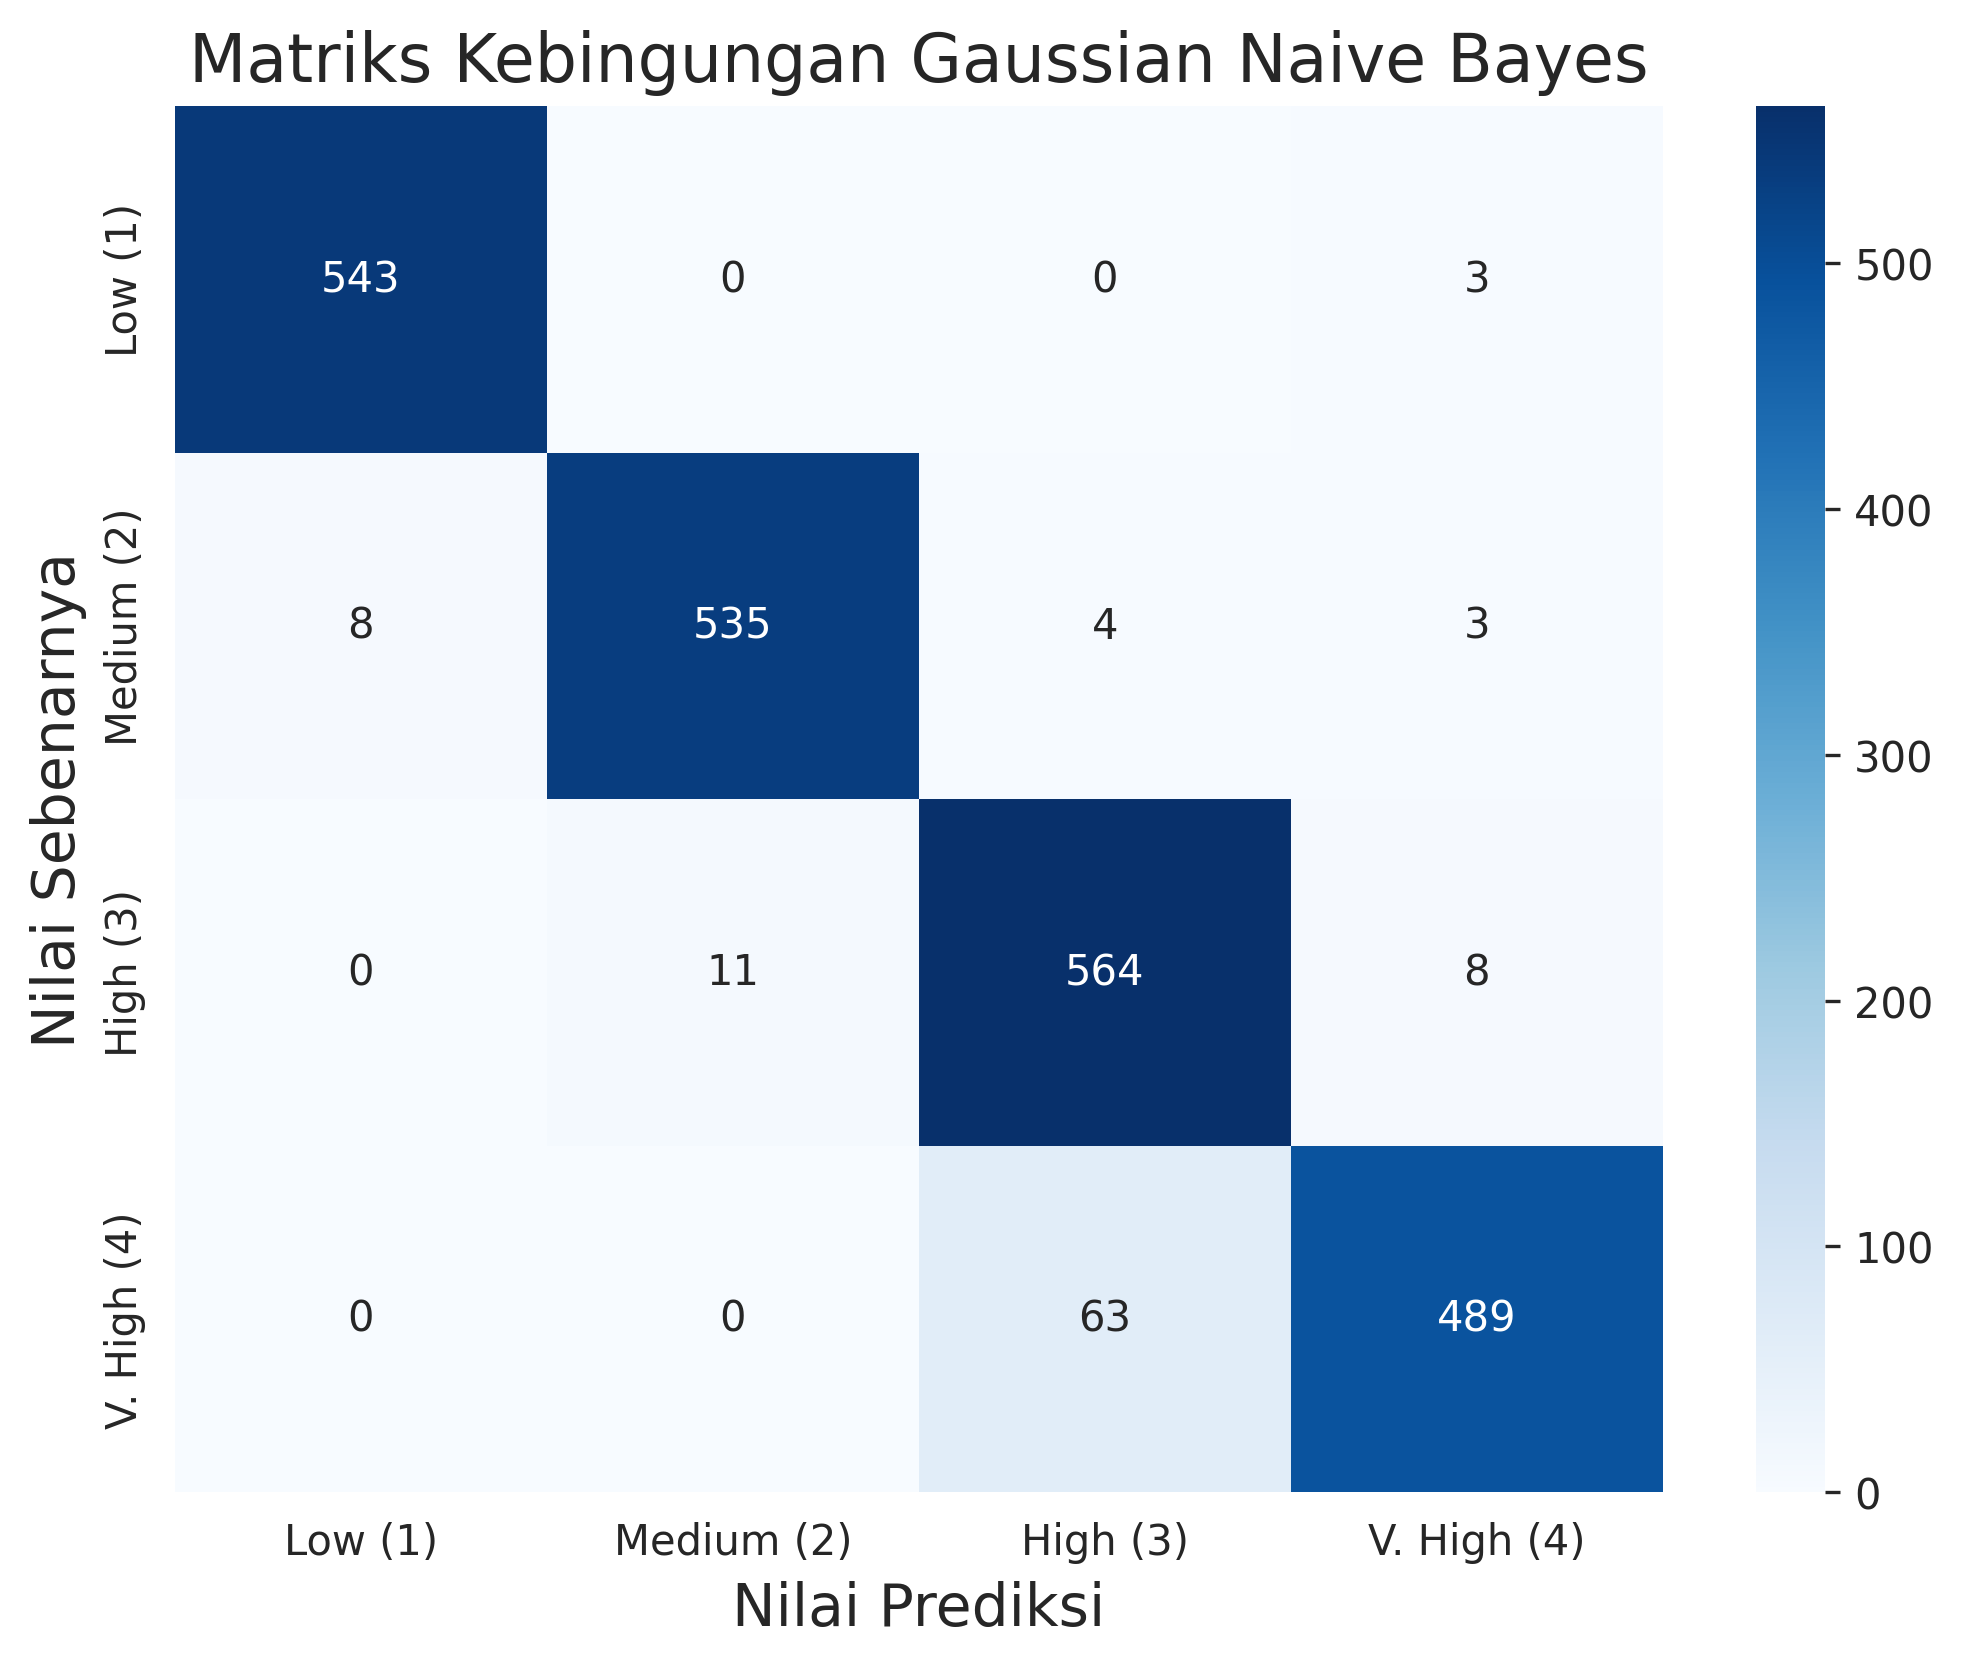


Pelatihan dan evaluasi model selesai. Matriks Kebingungan telah divisualisasikan.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# PENTING: Tambahkan import metrics untuk fungsi metrics.accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# PENTING: Asumsi X_train, X_test, Y_train, Y_test sudah didefinisikan
# dari proses splitting data sebelumnya (data_splitting.py).

# Jika belum menjalankan splitting data, Anda akan mendapatkan error.
# Pastikan Anda menggunakan nama DataFrame yang konsisten (misalnya df_outlier_clean)

# ====================================================
# 1. INISIALISASI DAN PELATIHAN MODEL NAIVE BAYES
# ====================================================

print("=== 1. TRAINING MODEL GAUSSIAN NAIVE BAYES ===")

# Gaussian Naive Bayes (GNB) cocok untuk data numerik kontinu
# (meskipun fitur kita sebagian besar sudah di-encode integer).
gnb = GaussianNB()

# Latih model dengan data training
# X_train adalah fitur, Y_train adalah target (views_encoded)
gnb.fit(X_train, Y_train)

print("Pelatihan model Naive Bayes selesai.")

# ====================================================
# 2. PREDIKSI DAN HASIL
# ====================================================

print("\n=== 2. PREDIKSI HASIL ===")

# Prediksi hasil menggunakan data testing
Y_pred = gnb.predict(X_test)

# Tampilkan hasil prediksi pertama
print("Contoh 10 Hasil Prediksi (Y_pred):")
print(Y_pred[:10])

# Tampilkan 10 nilai sebenarnya (Y_test) untuk perbandingan
print("\nContoh 10 Nilai Sebenarnya (Y_test):")
print(Y_test[:10].values) # Menggunakan .values untuk tampilan array yang bersih

# ====================================================
# 3. EVALUASI MODEL
# ====================================================

print("\n=== 3. EVALUASI MODEL ===")

# --- KODE TAMBAHAN DARI PERMINTAAN ANDA ---
#melakukan print Y_pred sebagai Y prediksi
print("Prediksi (Y_pred):")
print(Y_pred)
print('\n')

#melakukan print akurasi yang dihasilkan
print("Akurasi Model:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')

#melakukan print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print('\n')

#melakukan print Classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
# --- AKHIR KODE TAMBAHAN ---


# Matriks Kebingungan (Confusion Matrix)
# Menunjukkan berapa banyak prediksi yang benar dan salah untuk setiap kelas (1, 2, 3, 4)
cm = confusion_matrix(Y_test, Y_pred)


# ====================================================
# 4. VISUALISASI MATRIKS KEBINGUNGAN
# ====================================================

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Low (1)', 'Medium (2)', 'High (3)', 'V. High (4)'],
    yticklabels=['Low (1)', 'Medium (2)', 'High (3)', 'V. High (4)']
)
plt.title('Matriks Kebingungan Gaussian Naive Bayes', fontsize=16)
plt.ylabel('Nilai Sebenarnya', fontsize=14)
plt.xlabel('Nilai Prediksi', fontsize=14)
plt.show()

print("\nPelatihan dan evaluasi model selesai. Matriks Kebingungan telah divisualisasikan.")

In [ ]:
#melakukan print Y_pred sebagai Y prediksi
print(Y_pred)
print('\n')
#melakukan print akurasi yang dihasilkan
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('\n')
#melakukan print confusion matrix
print(confusion_matrix(Y_test, Y_pred))
print('\n')
#melakukan print Classification report
print("Classification report")
print(classification_report(Y_test,Y_pred))

[3 3 3 ... 1 1 4]


Accuracy: 0.9551770506499327


[[543   0   0   3]
 [  8 535   4   3]
 [  0  11 564   8]
 [  0   0  63 489]]


Classification report
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       546
           2       0.98      0.97      0.98       550
           3       0.89      0.97      0.93       583
           4       0.97      0.89      0.93       552

    accuracy                           0.96      2231
   macro avg       0.96      0.96      0.96      2231
weighted avg       0.96      0.96      0.96      2231



In [ ]:
#menampilkan DataFrame yang membandingkan antara data actual dan data prediksi
x = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
x

,Actual,Predicted
2065,3,3
18398,4,3
194,3,3
9380,1,1
7427,4,4
...,...,...
26631,3,3
14865,4,3
883,1,1
25516,1,1


In [ ]:
#merepresentasikan rata – rata kesalahan (error) absolut antara hasil prediksi dengan nilai sebenarnya
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 0.04885701479157328


# **CLUSTERING**




=== 1. PREPROCESSING DATA UNTUK CLUSTERING ===
Data fitur berhasil di-scale. Shape: (7436, 8)

=== 2. MENENTUKAN K OPTIMAL (K-MEANS) ===


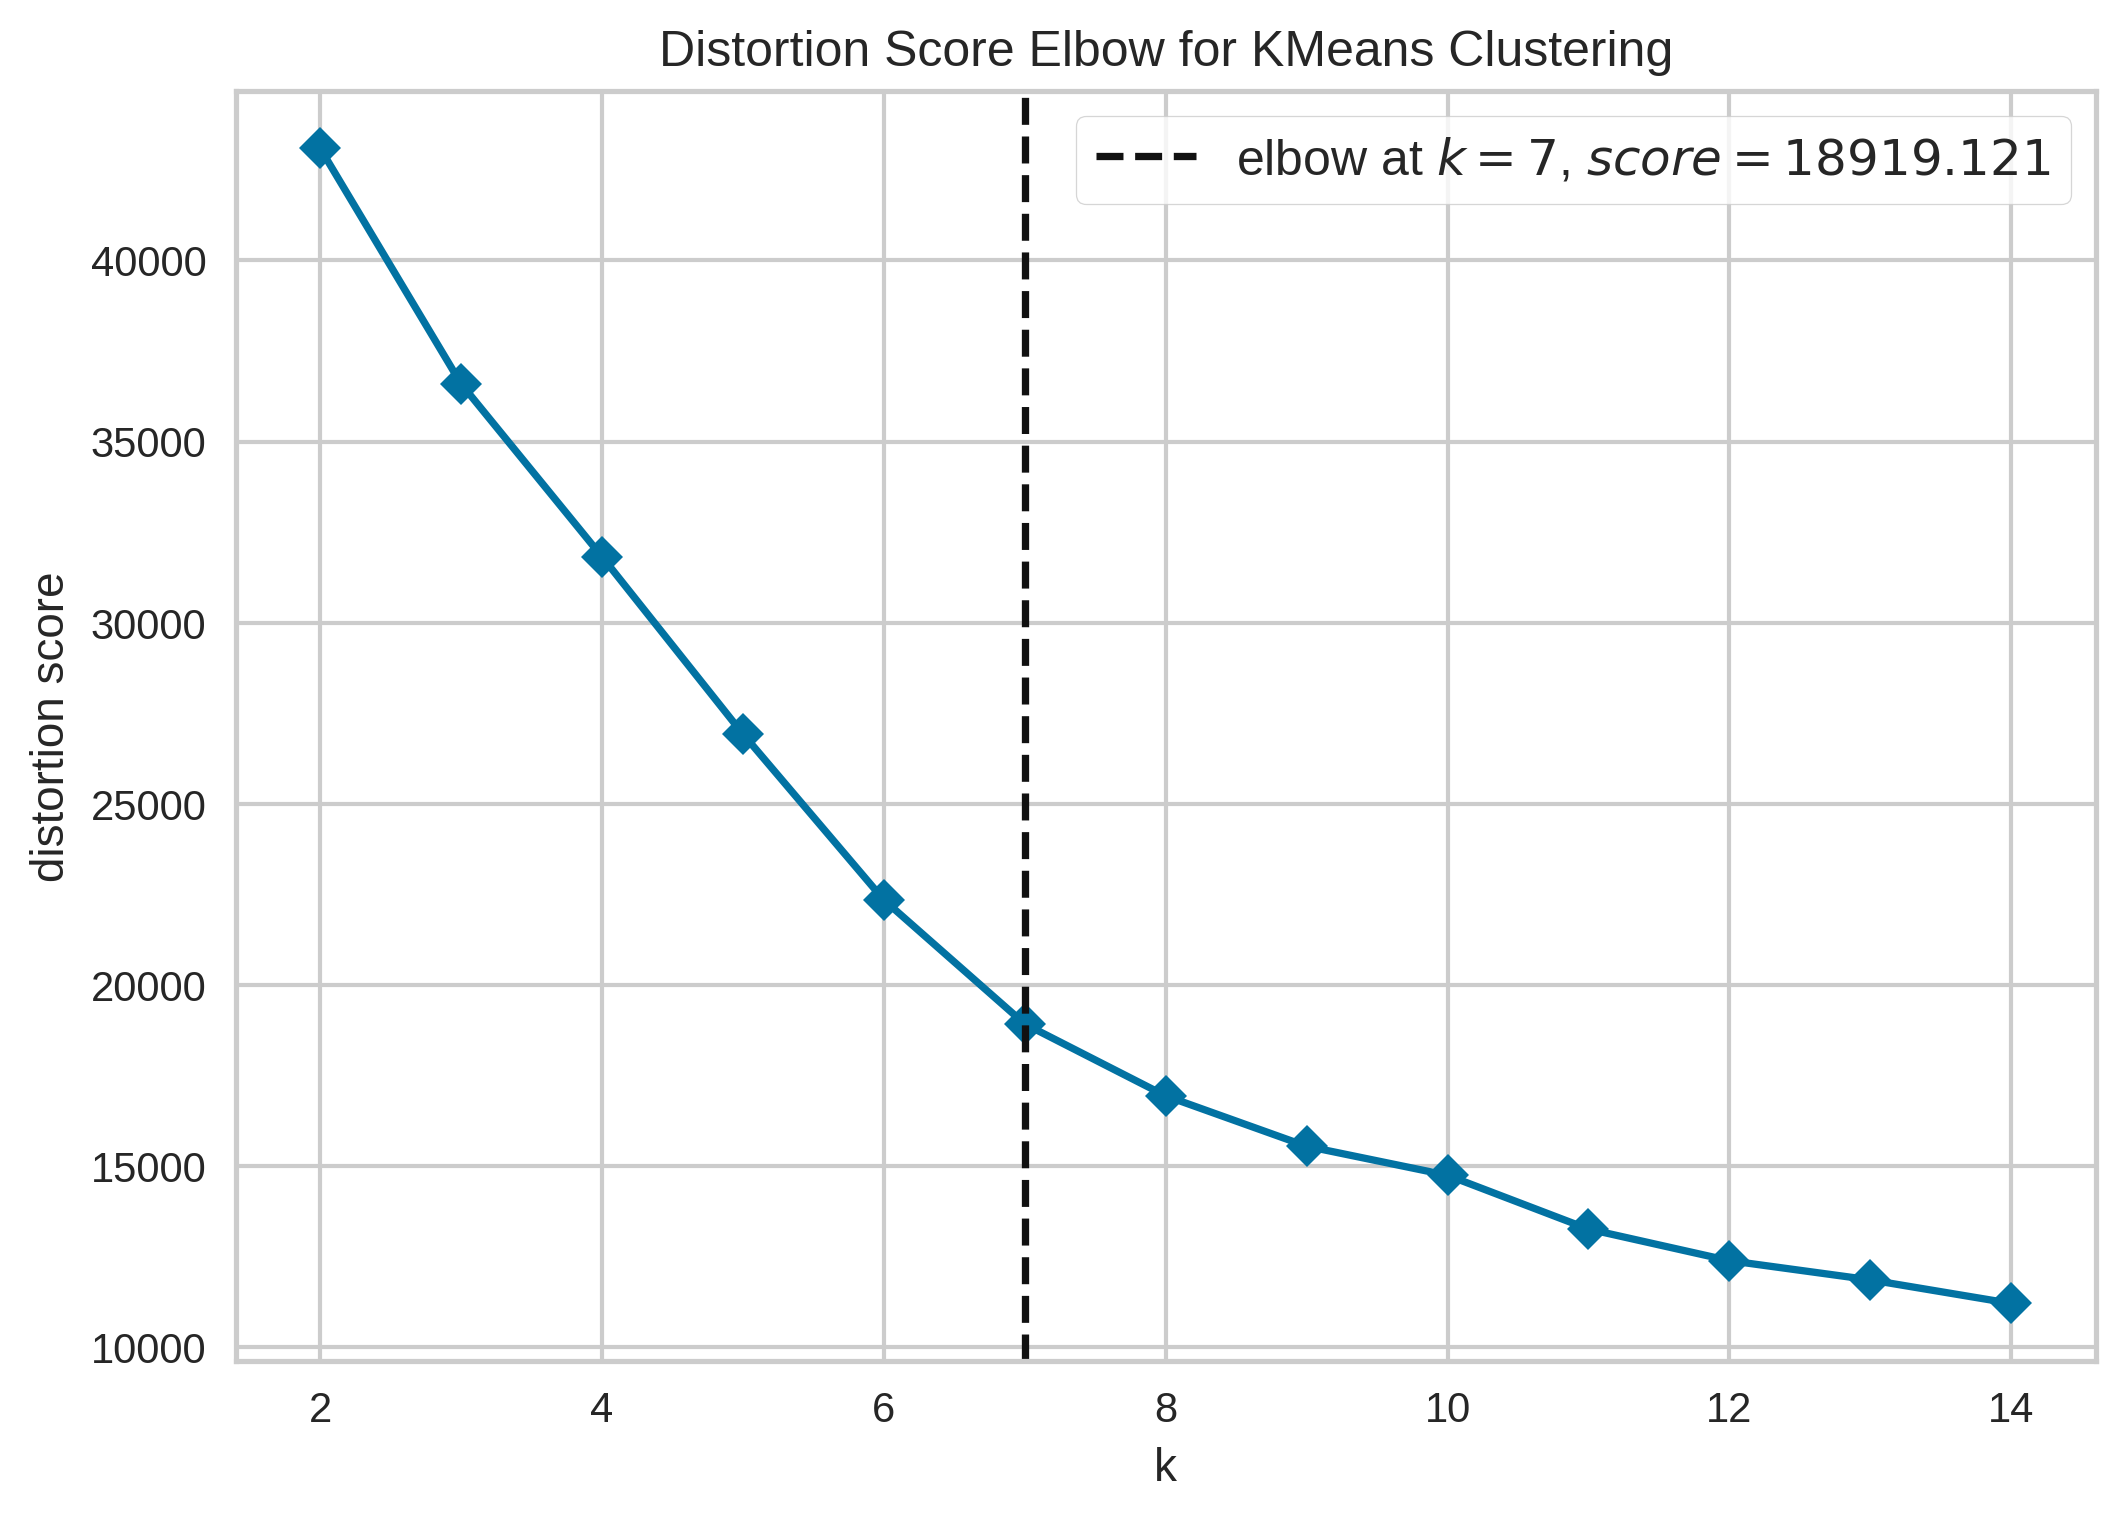

Nilai K Optimal yang Direkomendasikan: 7

=== 3. K-MEANS CLUSTERING (K=7) ===
K-Means: Berhasil mengelompokkan data ke dalam 7 cluster.

=== 4. DBSCAN CLUSTERING ===
DBSCAN: Berhasil mengelompokkan data. Jumlah cluster: 12
DBSCAN: Terdapat 424 outlier (Noise, diberi label -1).

=== 5. EVALUASI METRIK CLUSTERING ===
K-Means (K=7): Silhouette=0.3877, Calinski=2655
DBSCAN: Silhouette=0.3854, Calinski=2612

DataFrame Hasil Metrik (df_results) untuk dicek:
     Model                   Metric        Score
0  K-Means         Silhouette Score     0.387690
1  K-Means     Davies Bouldin Score     0.954454
2  K-Means  Calinski Harabasz Score  2655.040637
3   DBSCAN         Silhouette Score     0.385440
4   DBSCAN     Davies Bouldin Score     1.186582
5   DBSCAN  Calinski Harabasz Score  2611.555419

=== 6. VISUALISASI PERBANDINGAN METRIK CLUSTERING ===


/tmp/ipython-input-3232914739.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3232914739.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3232914739.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


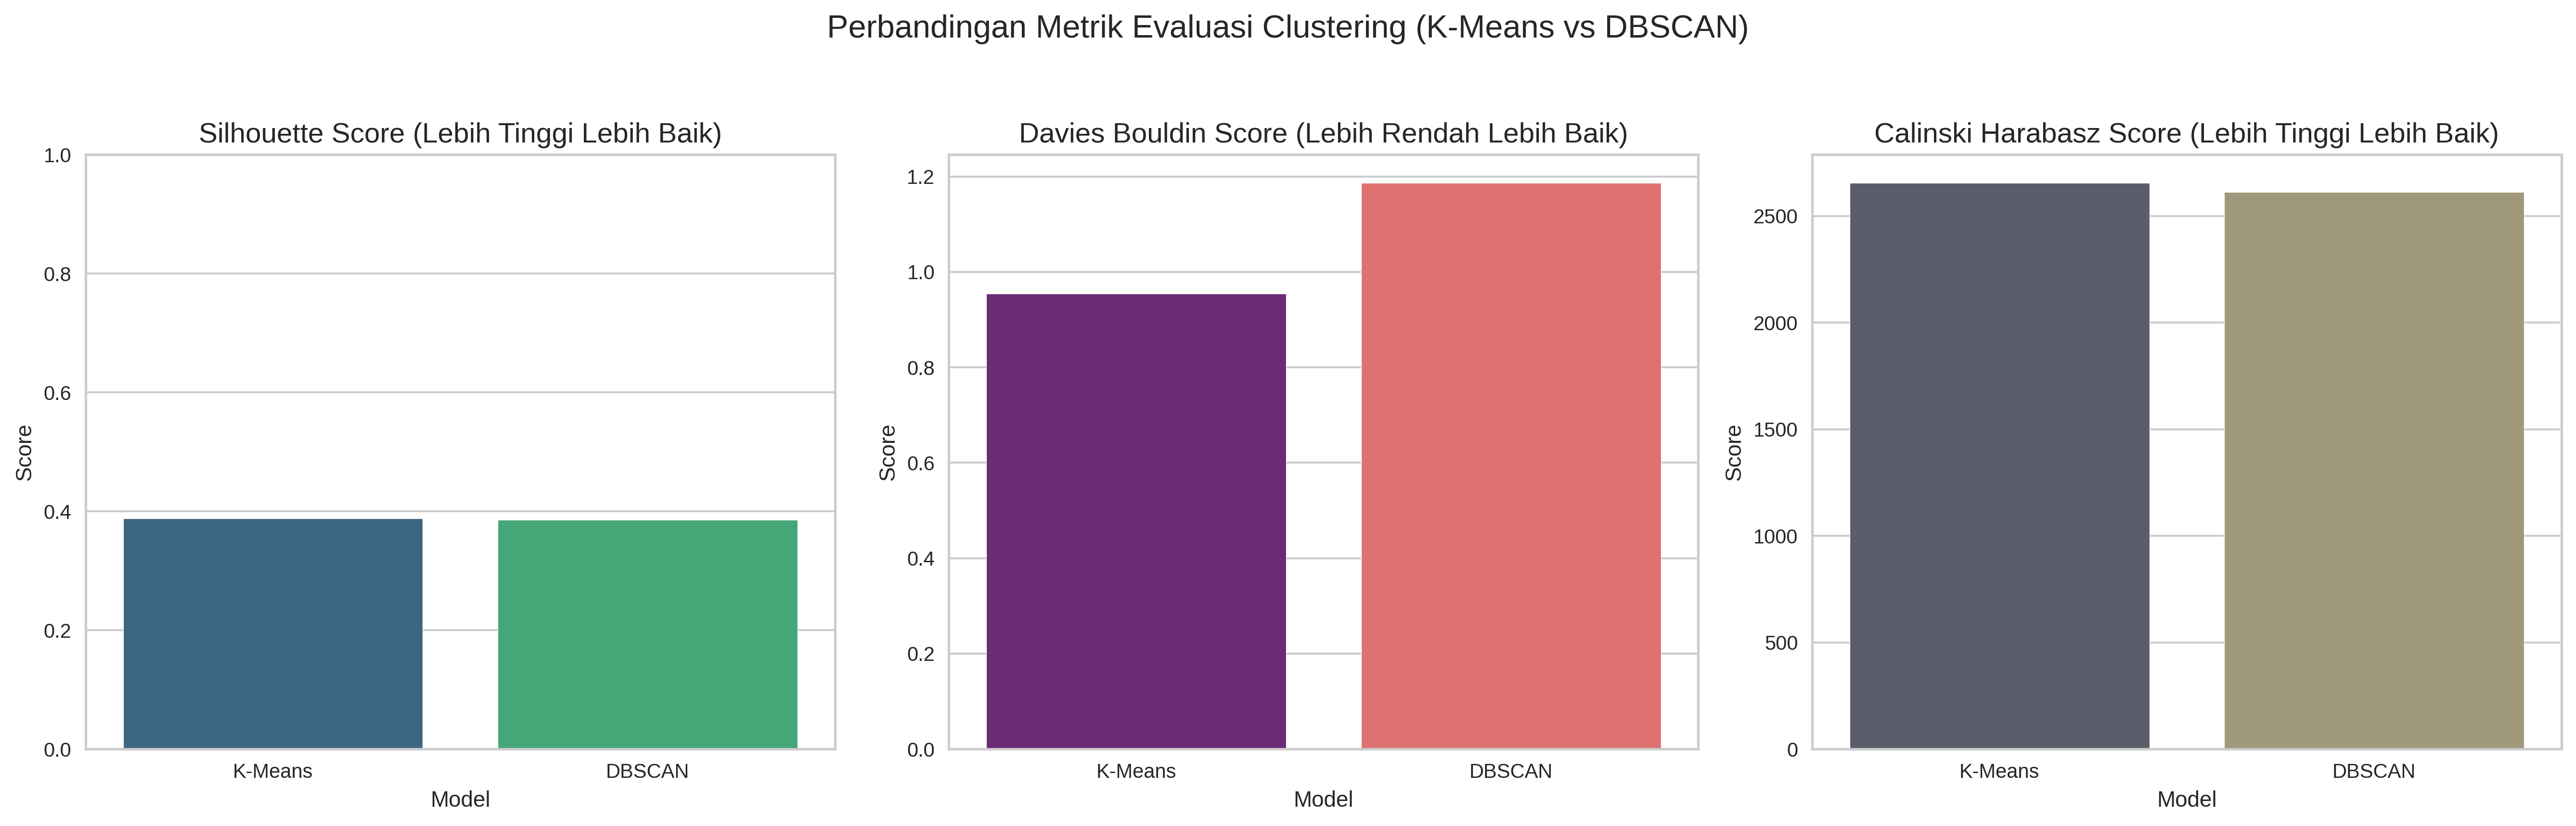


=== 7. ANALISIS REGIME (PROFIL RATA-RATA FITUR K-MEANS) ===

Profil Rata-Rata Fitur (Regime) Berdasarkan K-Means Cluster:
                       views      duration  published_year  published_month  \
KMeans_Cluster                                                                
0               1.757047e+06   1113.253012     2024.001339         9.544846   
1               1.694912e+06   1253.721533     2025.000000         4.833243   
2               1.405122e+06    438.476770     2024.995575         5.098451   
3               1.690314e+06   1038.506625     2024.006940         9.322397   
4               1.617118e+06   1460.269257     2025.000000         4.839695   
5               2.450243e+06  27434.048193     2024.855422         6.819277   
6               4.267922e+07    837.236842     2024.526316         6.750000   

                published_dayofweek  published_day_encoded  title_encoded  \
KMeans_Cluster                                                              
0          

/tmp/ipython-input-3232914739.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3232914739.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3232914739.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3232914739.py:209: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3232914739.py:209: FutureWarning: 

P

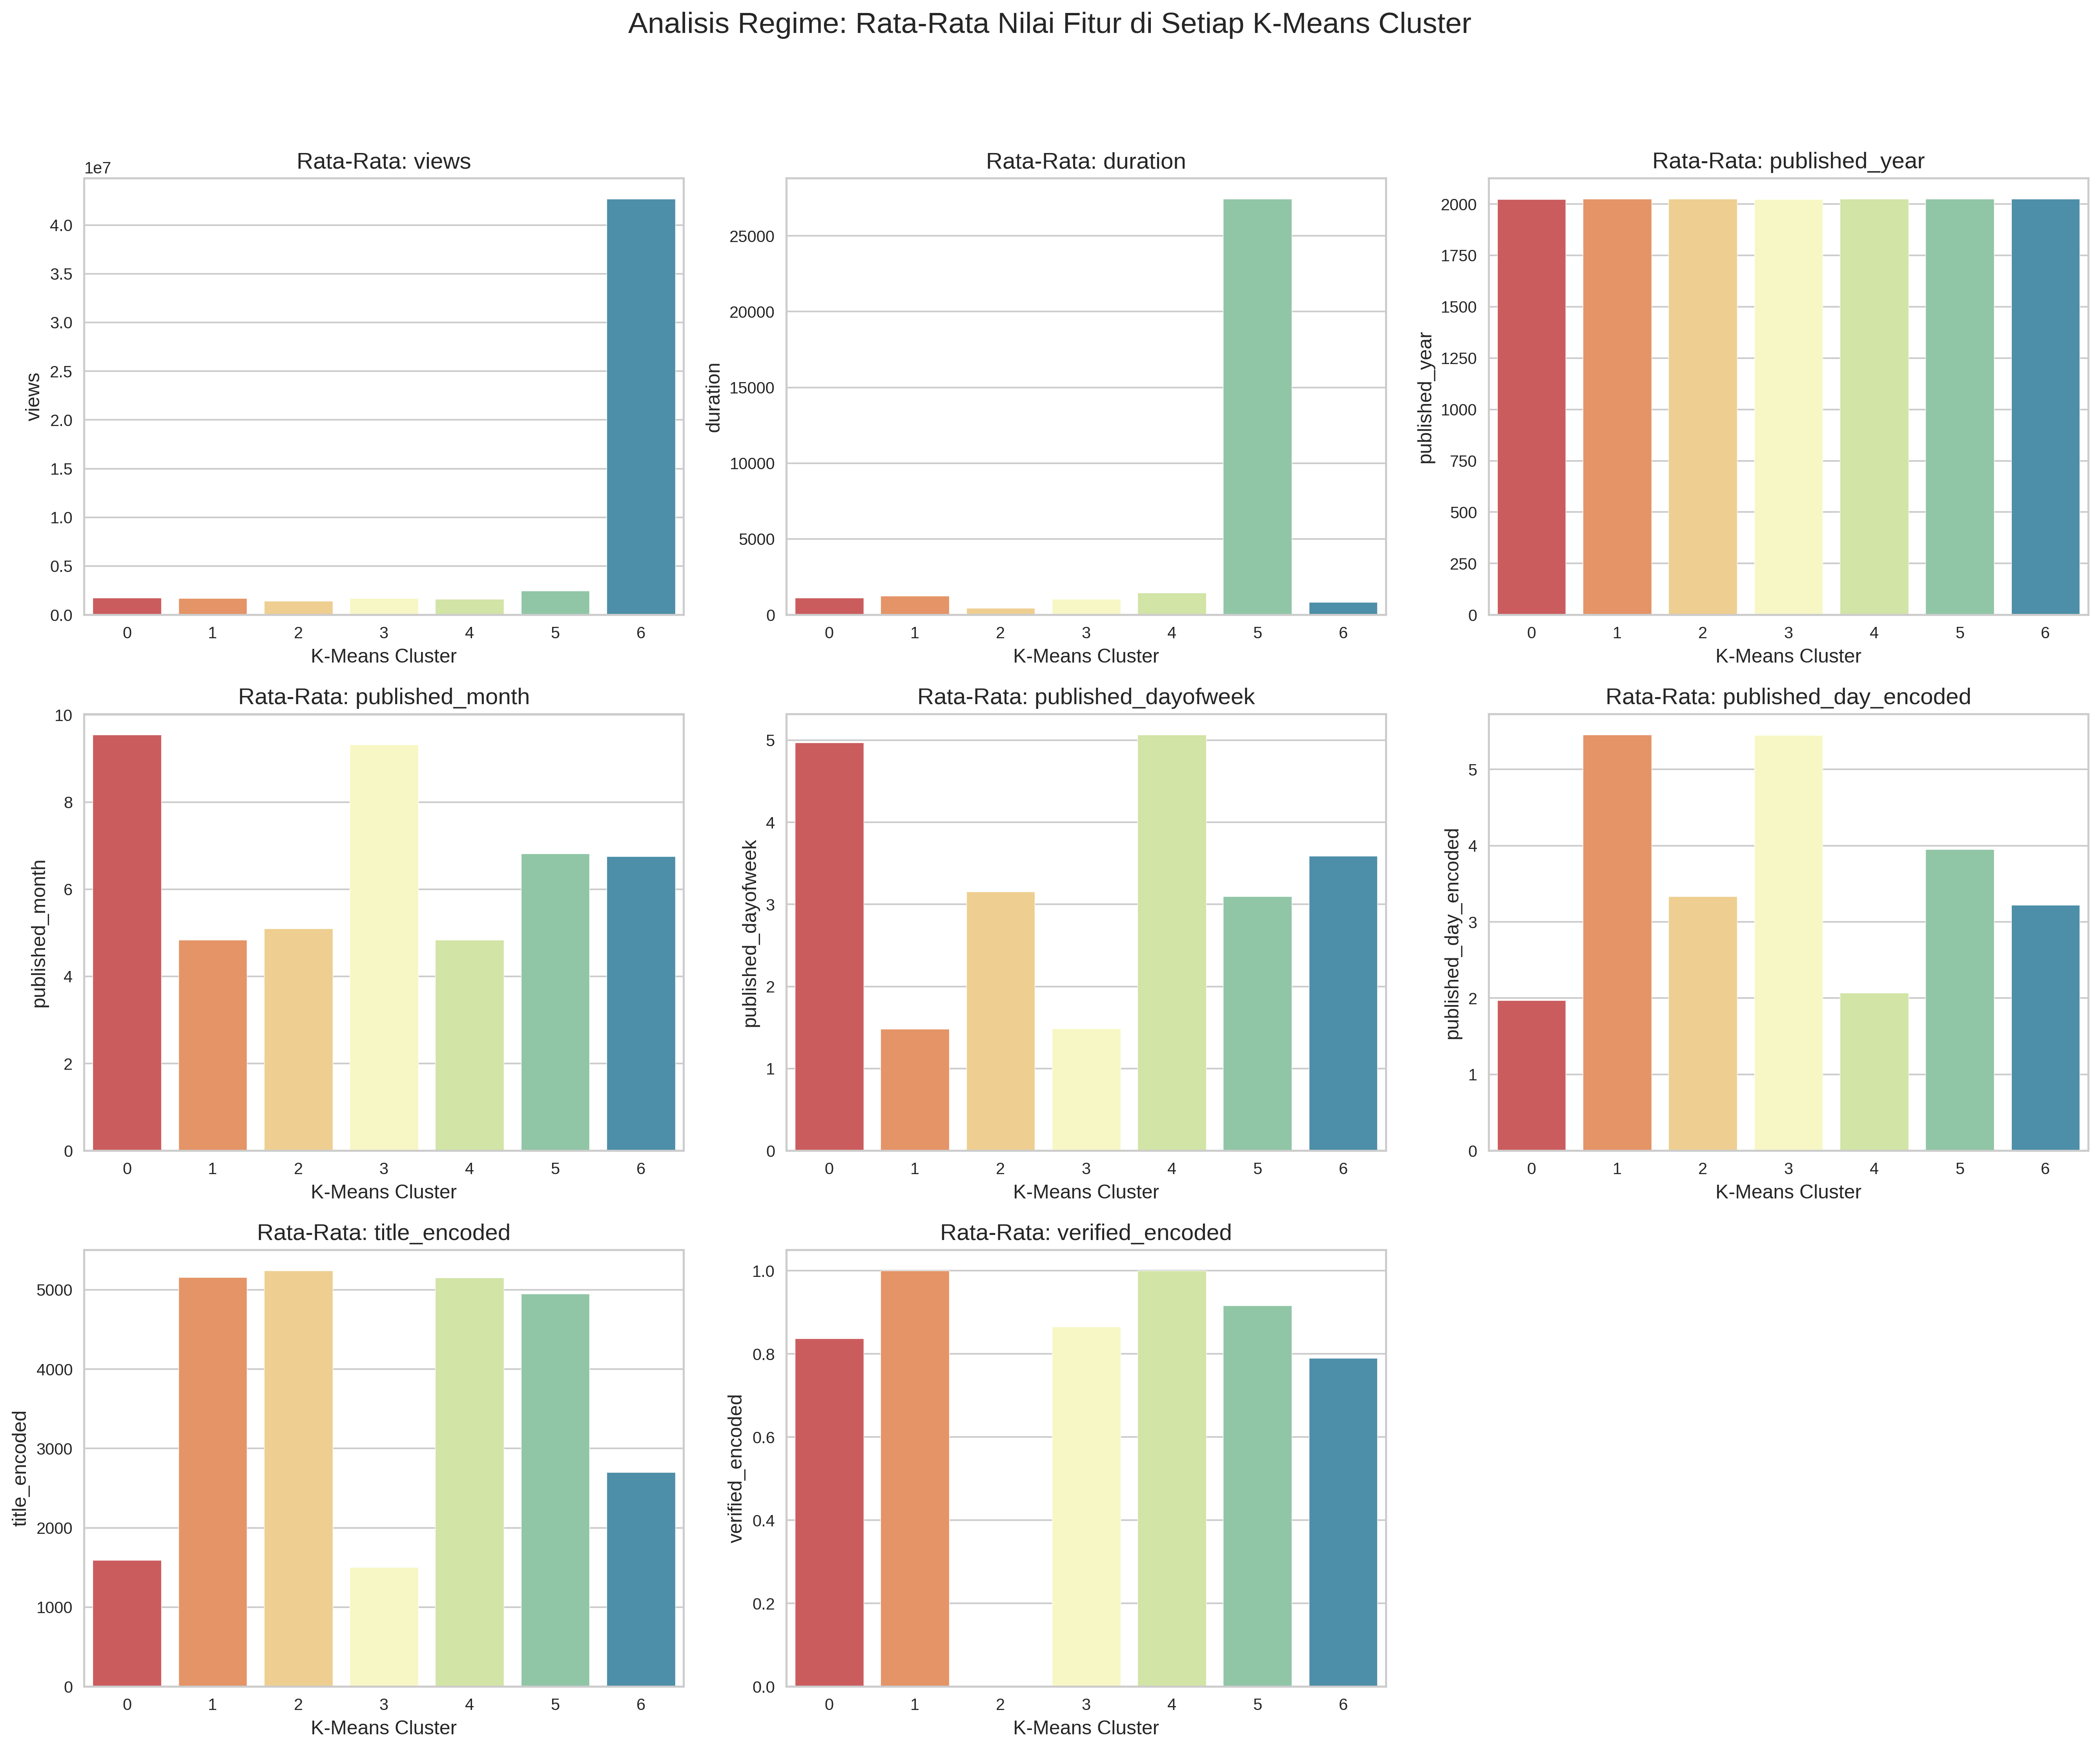


=== 8. VISUALISASI HASIL CLUSTERING (K-MEANS & DBSCAN) ===


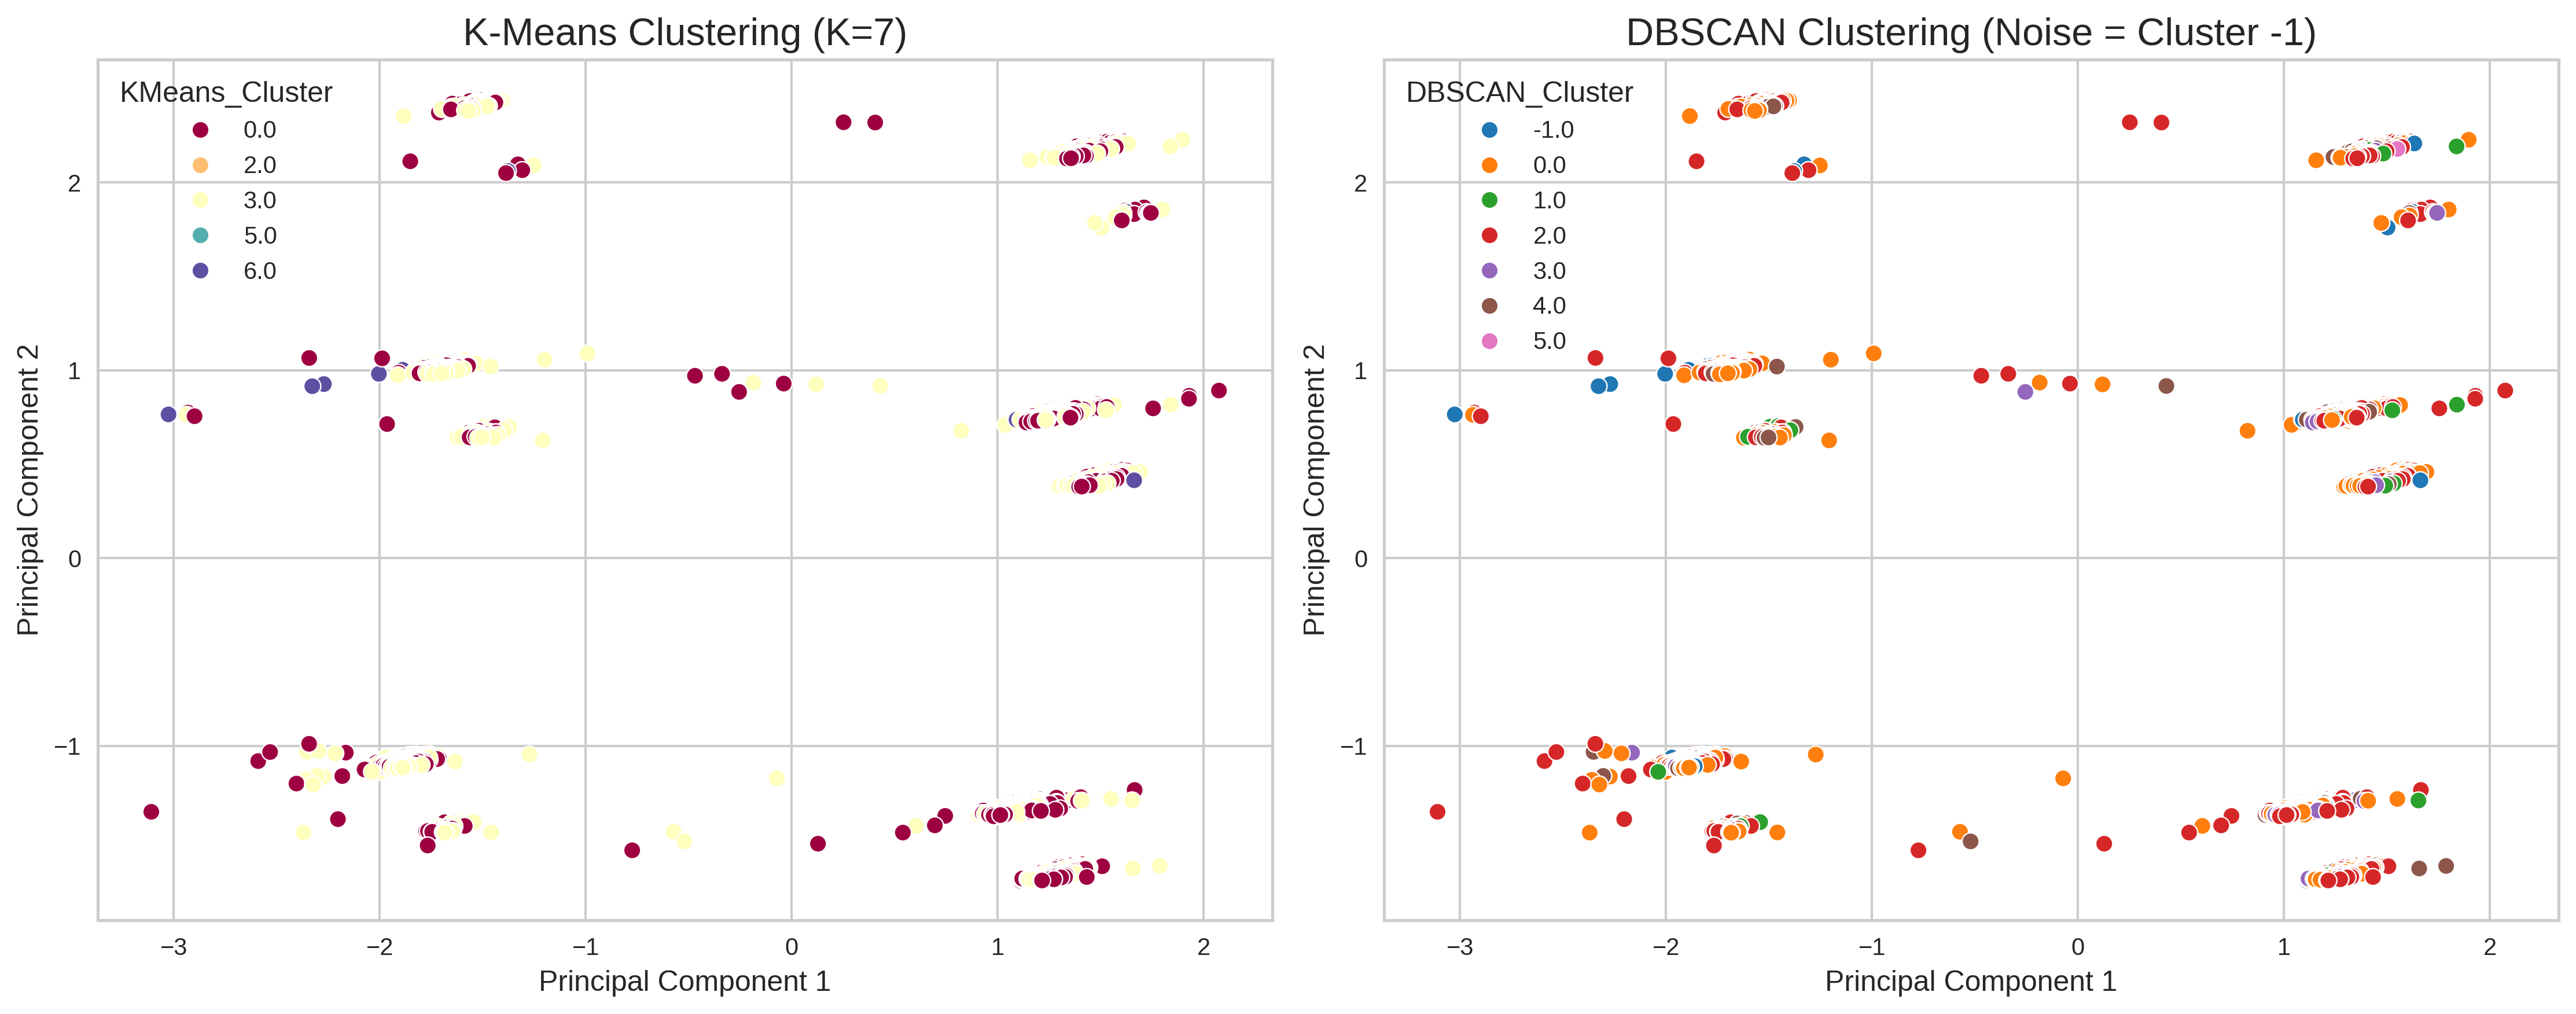


Analisis clustering selesai. Visualisasi Metrik, Profil Regime, dan Hasil PCA telah ditampilkan.


In [ ]:
!pip install yellowbrick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer # Membutuhkan pip install yellowbrick
from sklearn.decomposition import PCA # Diperlukan untuk visualisasi PCA

# PENTING: Asumsi df_outlier_clean sudah ada dan hanya berisi kolom integer.
# Menggunakan df_outlier_clean yang sudah disiapkan.
df = df_outlier_clean.copy()

# ============================================
# 1. PREPROCESSING UNTUK CLUSTERING
# ============================================

print("=== 1. PREPROCESSING DATA UNTUK CLUSTERING ===")

# Model clustering (terutama K-Means) sangat sensitif terhadap skala fitur.
# Kita perlu menstandardisasi data.

# Menghapus kolom yang tidak relevan untuk clustering:
X_cluster = df.drop(columns=['views_encoded', 'duration_encoded'])

# --- FILTER HANYA Kolom Numerik ---
X_cluster = X_cluster.select_dtypes(include=np.number)
# ---------------------------------------------------

# Inisialisasi Scaler
scaler = StandardScaler()
# Transformasi dan standardisasi data
X_scaled = scaler.fit_transform(X_cluster)
print(f"Data fitur berhasil di-scale. Shape: {X_scaled.shape}")


# ============================================
# 2. K OPTIMAL (ELBOW METHOD)
# ============================================

print("\n=== 2. MENENTUKAN K OPTIMAL (K-MEANS) ===")

# Menggunakan Yellowbrick KElbowVisualizer untuk visualisasi titik siku
model = KMeans(random_state=42, n_init=10)
# Tentukan rentang K yang ingin diuji (misalnya 2 hingga 15)
visualizer = KElbowVisualizer(model, k=(2, 15), timings=False)

# Visualisasi dan penentuan K
visualizer.fit(X_scaled)
visualizer.show() # Tampilkan plot elbow method

# Ambil nilai K optimal yang direkomendasikan
optimal_k = visualizer.elbow_value_
if optimal_k is None or optimal_k < 2:
    optimal_k = 3 # Default K jika Elbow method gagal atau mengembalikan nilai < 2
print(f"Nilai K Optimal yang Direkomendasikan: {optimal_k}")


# ============================================
# 3. K-MEANS CLUSTERING
# ============================================

print(f"\n=== 3. K-MEANS CLUSTERING (K={optimal_k}) ===")

# Inisialisasi dan latih model K-Means dengan K optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Tambahkan label cluster ke DataFrame
df['KMeans_Cluster'] = kmeans_labels
print(f"K-Means: Berhasil mengelompokkan data ke dalam {optimal_k} cluster.")


# ============================================
# 4. DBSCAN CLUSTERING
# ============================================

print("\n=== 4. DBSCAN CLUSTERING ===")
# Parameter DBSCAN (contoh nilai umum untuk data yang sudah di-scale)
DBSCAN_EPS = 0.8
DBSCAN_MIN_SAMPLES = 10

dbscan = DBSCAN(eps=DBSCAN_EPS, min_samples=DBSCAN_MIN_SAMPLES, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Tambahkan label cluster ke DataFrame
df['DBSCAN_Cluster'] = dbscan_labels
n_clusters_dbscan = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN: Berhasil mengelompokkan data. Jumlah cluster: {n_clusters_dbscan}")
print(f"DBSCAN: Terdapat {np.sum(dbscan_labels == -1)} outlier (Noise, diberi label -1).")


# ============================================
# 5. EVALUASI METRIK CLUSTERING (TERMASUK CALINSKI & SILHOUETTE)
# ============================================

print("\n=== 5. EVALUASI METRIK CLUSTERING ===")
results = []

# --- K-Means Evaluation ---
if optimal_k > 1:
    silhouette_km = silhouette_score(X_scaled, kmeans_labels)
    davies_km = davies_bouldin_score(X_scaled, kmeans_labels)
    calinski_km = calinski_harabasz_score(X_scaled, kmeans_labels) # HITUNG CALINSKI

    results.append({'Model': 'K-Means', 'Metric': 'Silhouette Score', 'Score': silhouette_km})
    results.append({'Model': 'K-Means', 'Metric': 'Davies Bouldin Score', 'Score': davies_km})
    results.append({'Model': 'K-Means', 'Metric': 'Calinski Harabasz Score', 'Score': calinski_km})

    print(f"K-Means (K={optimal_k}): Silhouette={silhouette_km:.4f}, Calinski={calinski_km:.0f}")

# --- DBSCAN Evaluation ---
# Hitung hanya cluster yang valid (label >= 0) dan harus ada lebih dari 1 cluster valid
core_samples_mask = dbscan_labels != -1
if n_clusters_dbscan > 1:
    X_dbscan = X_scaled[core_samples_mask]
    labels_dbscan = dbscan_labels[core_samples_mask]

    silhouette_db = silhouette_score(X_dbscan, labels_dbscan)
    davies_db = davies_bouldin_score(X_dbscan, labels_dbscan)
    calinski_db = calinski_harabasz_score(X_dbscan, labels_dbscan) # HITUNG CALINSKI

    results.append({'Model': 'DBSCAN', 'Metric': 'Silhouette Score', 'Score': silhouette_db})
    results.append({'Model': 'DBSCAN', 'Metric': 'Davies Bouldin Score', 'Score': davies_db})
    results.append({'Model': 'DBSCAN', 'Metric': 'Calinski Harabasz Score', 'Score': calinski_db})

    print(f"DBSCAN: Silhouette={silhouette_db:.4f}, Calinski={calinski_db:.0f}")
else:
    print("\nDBSCAN menghasilkan 0 atau 1 cluster valid, metrik tidak dapat dihitung.")

# Konversi hasil ke DataFrame untuk visualisasi
df_results = pd.DataFrame(results)
print("\nDataFrame Hasil Metrik (df_results) untuk dicek:")
print(df_results) # Cetak hasilnya untuk memastikan skor sudah ada


# ============================================
# 6. VISUALISASI METRIK EVALUASI (BARPLOTS)
# ============================================

print("\n=== 6. VISUALISASI PERBANDINGAN METRIK CLUSTERING ===")

# Set 3 subplot untuk 3 metrik
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
plt.suptitle("Perbandingan Metrik Evaluasi Clustering (K-Means vs DBSCAN)", fontsize=16)

# Metrik 1: Silhouette Score (Higher is Better, max 1)
sns.barplot(
    x='Model',
    y='Score',
    data=df_results[df_results['Metric'] == 'Silhouette Score'],
    ax=axes[0],
    palette='viridis'
)
axes[0].set_title('Silhouette Score (Lebih Tinggi Lebih Baik)', fontsize=14)
axes[0].set_ylim(0, 1) # Jaminan Skala Y 0-1 untuk Silhouette

# Metrik 2: Davies Bouldin Score (Lower is Better, min 0)
sns.barplot(
    x='Model',
    y='Score',
    data=df_results[df_results['Metric'] == 'Davies Bouldin Score'],
    ax=axes[1],
    palette='magma'
)
axes[1].set_title('Davies Bouldin Score (Lebih Rendah Lebih Baik)', fontsize=14)
axes[1].set_ylim(bottom=0) # Jaminan Skala Y dimulai dari 0

# Metrik 3: Calinski Harabasz Score (Higher is Better)
sns.barplot(
    x='Model',
    y='Score',
    data=df_results[df_results['Metric'] == 'Calinski Harabasz Score'],
    ax=axes[2],
    palette='cividis'
)
axes[2].set_title('Calinski Harabasz Score (Lebih Tinggi Lebih Baik)', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# ============================================
# 7. ANALISIS REGIME (PROFIL RATA-RATA FITUR K-MEANS)
# ============================================

print("\n=== 7. ANALISIS REGIME (PROFIL RATA-RATA FITUR K-MEANS) ===")

# Hitung rata-rata fitur asli untuk setiap K-Means cluster
cluster_profiles = df.groupby('KMeans_Cluster')[X_cluster.columns].mean()
print("\nProfil Rata-Rata Fitur (Regime) Berdasarkan K-Means Cluster:")
print(cluster_profiles)

# Visualisasi Regime (Profil Cluster) menggunakan bar plot
n_features = len(X_cluster.columns)
n_cols = 3
# Hitung jumlah baris yang dibutuhkan
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() # Ratakan array untuk pengindeksan mudah

plt.suptitle("Analisis Regime: Rata-Rata Nilai Fitur di Setiap K-Means Cluster", fontsize=18, y=1.02)

for i, col in enumerate(X_cluster.columns):
    sns.barplot(
        x=cluster_profiles.index,
        y=cluster_profiles[col],
        ax=axes[i],
        palette='Spectral'
    )
    axes[i].set_title(f'Rata-Rata: {col}', fontsize=14)
    axes[i].set_xlabel('K-Means Cluster', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Sembunyikan subplot yang tidak digunakan jika jumlah fitur tidak penuh
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


# ============================================
# 8. VISUALISASI HASIL CLUSTERING (MENGGUNAKAN PCA)
# ============================================

print("\n=== 8. VISUALISASI HASIL CLUSTERING (K-MEANS & DBSCAN) ===")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = df['KMeans_Cluster'] # Ambil dari DataFrame utama
pca_df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'] # Ambil dari DataFrame utama

plt.figure(figsize=(15, 6))

# Plot 1: K-Means Clustering (Menggunakan PCA)
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='KMeans_Cluster',
    data=pca_df,
    palette='Spectral', # Palet warna yang bagus
    legend='full',
    s=50
)
plt.title(f'K-Means Clustering (K={optimal_k})', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)


# Plot 2: DBSCAN Clustering (Menggunakan PCA)
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='DBSCAN_Cluster',
    data=pca_df,
    palette='tab10', # Palet untuk DBSCAN
    legend='full',
    s=50
)
plt.title('DBSCAN Clustering (Noise = Cluster -1)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)


plt.tight_layout()
plt.show()

print("\nAnalisis clustering selesai. Visualisasi Metrik, Profil Regime, dan Hasil PCA telah ditampilkan.")